## **Business Problem:**

On Black Friday, does spending differ between men and women, and can Walmart find patterns to make better decisions?

## **Why This Analysis Matters to the Business**

**Better Marketing & Promotions**

*   If women spend more on Black Friday, Walmart can target more promotions to female customers.
*   If certain products are more popular among a specific gender, advertisements can be tailored accordingly.

**Smarter Inventory Management**
*   Knowing what different genders purchase can help stock the right products in the right quantities, avoiding overstock or stockouts.

**Personalized Customer Experience**
*   Understanding spending habits helps customize offers, improve customer satisfaction, and build brand loyalty.

**Revenue Optimization**
*   By identifying high-spending segments, Walmart can design strategies to maximize revenue from each group.

**Data-Driven Decision Making**
*   Instead of guessing customer behavior, the management uses actual data to make confident decisions.



## **Downloading a dataframe and reading the csv file**

## **What good looks like?**

### **1. Import the dataset and do usual data analysis steps like checking the structure & characteristics of the dataset.**

In [4]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094 -O walmart_data.csv


Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094
To: /content/walmart_data.csv
100% 23.0M/23.0M [00:00<00:00, 67.2MB/s]


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df_org = pd.read_csv('walmart_data.csv')
df_org

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [6]:
df_org.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


*   The same user (User_ID = 1000001) appears multiple times, indicating multiple transactions per customer.
*   The dataset contains both Male (M) and Female (F) customers.
*   Age is given in bins (like '0-17', '55+', etc.), which suggests we should treat it as a categorical variable, not numerical
*   Column City_Category contains values like 'A', 'B', 'C' — possibly representing different city tiers.
*   Stay_In_Current_City_Years has values like '2', '4+', etc., showing how long a customer has stayed in their city — again, a categorical feature.
*   The column is coded as 0 (Unmarried) and 1 (Married)
*   Appears to be a numerical label (like 3, 1, 12, 8) possibly referring to a category of product purchased
*   The Purchase column is continuous numerical data and represents the amount spent


In [7]:
# Shape of dataset
df_org.shape

(550068, 10)

It shows 550068 rows and 10 columns which shows it is a sample data from 100 million population

In [8]:
# Checking if there is any null values in my data
df_org.isnull().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category,0
Purchase,0


Dataset looks clean. No null values

In [9]:
df_org.describe(include = "O")

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


*  The dataset contains a wide variety of products (3,631 unique IDs)
*  The most popular product(P00265242) purchased 1,880 times.
*  The majority of users are males aged 26–35, predominantly from City Category B, and most have stayed in their current city for 1 year.

In [10]:
df_org[df_org.duplicated()]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase


No Duplicate records

In [11]:
df_org.groupby(by="Gender")["User_ID"].nunique()

,User_ID
Gender,
F,1666
M,4225


*   There are 1,666 unique female users in the dataset
*   There are 4,225 unique male users in the dataset
This indicates that male customers are more than 2.5 times the number of female customers in the dataset.

This imbalance might be worth considering in customer segmentation or targeted marketing analysis


## **Evaluation Criteria**

###**1. Defining Problem Statement and Analyzing basic metrics**
###   1.1. Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), statistical summary




In [12]:
df_org.shape

(550068, 10)

It shows 550068 rows and 10 columns which shows it is a sample data from 100 million population

In [13]:
# Data types of all the attributes
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [14]:
# Identifying the categorical attributes
cat_temp_df = pd.DataFrame(columns=['Column', 'Unique Count'])
for column in df_org.columns:
  new_row = {'Column': column, 'Unique Count': df_org[column].nunique()}
  cat_temp_df = pd.concat([cat_temp_df, pd.DataFrame([new_row])], ignore_index=True)
cat_temp_df

,Column,Unique Count
0,User_ID,5891
1,Product_ID,3631
2,Gender,2
3,Age,7
4,Occupation,21
5,City_Category,3
6,Stay_In_Current_City_Years,5
7,Marital_Status,2
8,Product_Category,20
9,Purchase,18105


A column is a good candidate for category if:
1. It has much fewer unique values compared to the total dataset
2. It represents categorical data.

Therefore we have considered below columns for categorical data

Gender: 2 | Age: 7 | Occupation: 21 | City_Category: 3 | Stay_In_Current_City_Years: 5 | Marital_Status: 2 | Product_Category: 20 |

In [15]:
# Conversion of categorical attributes to 'category' (If required)
categorical_df = df_org.copy()
cols_to_category = ['Gender', 'Age', 'Occupation', 'City_Category',
                    'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']

categorical_df[cols_to_category] = categorical_df[cols_to_category].astype('category')
categorical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  int64   
 1   Product_ID                  550068 non-null  object  
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  category
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  category
 9   Purchase                    550068 non-null  int64   
dtypes: category(7), int64(2), object(1)
memory usage: 16.3+ MB


The dataset is clean with no missing values and a balanced mix of categorical and numerical features. Demographic details such as Age, Gender, and Marital Status, along with purchase behavior, provide rich opportunities for customer segmentation and trend analysis. Some categorical variables may require encoding for graph/visualization

In [16]:
# Statistical Summary for int columns
categorical_df.describe(include=['int64']).T.astype(int)

,count,mean,std,min,25%,50%,75%,max
User_ID,550068,1003028,1727,1000001,1001516,1003077,1004478,1006040
Purchase,550068,9263,5023,12,5823,8047,12054,23961


Since User_ID is just an identifier, these statistics does not tell us much about user behavior.

However, Purchase column shows following statistics:
*   The purchase amount varies widely (from ₹12 to ₹23,961)
*   The average purchase is around ₹9,263
*   Since the mean (₹9,263) > median (₹8,047), the distribution is slightly right-skewed (a few people made very high purchases)
*   We have a good number of records (550K+), so the data is rich for analysis

In [17]:
# Statistical Summary for categorical columns
cat_summary = categorical_df.describe(include='category').T
cat_summary['unique'] = categorical_df.nunique()
cat_summary

,count,unique,top,freq
Gender,550068,2,M,414259
Age,550068,7,26-35,219587
Occupation,550068,21,4,72308
City_Category,550068,3,B,231173
Stay_In_Current_City_Years,550068,5,1,193821
Marital_Status,550068,2,0,324731
Product_Category,550068,20,5,150933


**Consumer Behavior:**
*   The dataset has a strong male majority (75%). This could mean marketing strategies need to be tailored toward male preferences
*   The most common age range is 26-35, suggesting that young professionals make up a large portion of this data. Their spending patterns might favor technology, lifestyle, and career-focused products
*   Occupation category 4 dominates, but without more context on what this occupation represents, deeper insights are limited
*   Most participants come from Category B cities, indicating mid-tier urban consumers might be key drivers of purchasing trends

**Behavioral Insights:**
*   **Stay in Current City**: The most frequent response is 1 year, suggesting that a large portion of the sample are recent migrants. This could impact housing, furniture, and essential product purchases.
*   **Marital Status:** Most individuals are marked as 0, which may indicate unmarried consumers. This can shift demand toward personal and luxury goods instead of family-oriented products.

**Product Preferences**
*  Product Category 5 is the most frequently purchased, appearing 150,933 times. If this category includes electronics or fashion, it could suggest high demand in those areas.








###   1.2. Non-Graphical Analysis: Value counts and unique attributes

In [18]:
def get_purchase_summary(df, column_name, top_n=None):
    summary_df = (
        df.groupby(column_name, observed=False)['Purchase'].agg(['count', 'sum']).reset_index().rename(columns={
            'count': 'Purchase_Count',
            'sum': 'Total_Purchase_Amount'
        }).sort_values(by='Purchase_Count', ascending=False)
    )

    if top_n:
        summary_df = summary_df.head(top_n)

    return summary_df

In [19]:
get_purchase_summary(categorical_df, 'User_ID', top_n=10).T

,1634,4166,1885,1142,863,3520,1111,981,5647,5683
User_ID,1001680,1004277,1001941,1001181,1000889,1003618,1001150,1001015,1005795,1005831
Purchase_Count,1026,979,898,862,823,767,752,740,729,727
Total_Purchase_Amount,8699596,10536909,6817493,6387961,5499872,5962012,4728932,6511314,5464535,6512433


*   User ID : 1001680 is the most frequent buyer
*   User ID : 1004277 Top spender per transaction (Avg. Purchase value)
*   User ID : 1005831 Least purchases, still high spending

**Business Insights:**
*   Some users purchase more frequently, but others spend more per transaction. Walmart could:
    
    -Target high-frequency users with loyalty programs
    
    -Target high-spenders with premium offers or personalized deals

In [20]:
get_purchase_summary(categorical_df, 'Product_ID', top_n=10).T

,2536,249,1016,1030,565,1745,458,569,1355,582
Product_ID,P00265242,P00025442,P00110742,P00112142,P00057642,P00184942,P00046742,P00058042,P00145042,P00059442
Purchase_Count,1880,1615,1612,1562,1470,1440,1438,1422,1406,1406
Total_Purchase_Amount,14165515,27995166,26722309,24216006,23102780,24334887,21152882,12250634,20411342,24338343


If we take the Avg. Purchase value Products like P00025442 and P00059442 are revenue drivers despite lower volume

**Business Insights:**
*   Promote these in premium campaigns

Products like P00265242 bring high volume, possibly at lower profits

**Business Insights:**
*   driving traffic and volume-based offers

In [21]:
get_purchase_summary(categorical_df, 'Gender', top_n=10).T

,1,0
Gender,M,F
Purchase_Count,414259,135809
Total_Purchase_Amount,3909580100,1186232642


Men (M) make ~3x more purchases than women (F)

Men also spend more in total – 3.9B vs 1.18B

**Business Insights:**
*   Walmart could target male customers more aggressively during Black Friday promotions based on higher spending and frequency.

*   However, since women still show strong purchasing, there's an opportunity to increase female engagement through tailored deals or campaigns.


In [22]:
get_purchase_summary(categorical_df, 'Age', top_n=10).T

,2,3,1,4,5,6,0
Age,26-35,36-45,18-25,46-50,51-55,55+,0-17
Purchase_Count,219587,110013,99660,45701,38501,21504,15102
Total_Purchase_Amount,2031770578,1026569884,913848675,420843403,367099644,200767375,134913183


26–35 age group is the most active, making the highest number of purchases and spending the most in total.

51–55 and 55+ age groups have fewer transactions, but higher average spending per purchase.

The youngest group (0–17) makes the fewest purchases and also spends the least on average — not surprising.

Avg spending is fairly consistent across most age groups (9k–9.5k), but slight variations could matter in targeted marketing.

**Business Insights:**
*   Target 26–35 group with volume-based offers (they shop more frequently).

*   Consider premium offers or upsells for older segments (51+) — they spend more per transaction.

In [23]:
get_purchase_summary(categorical_df, 'Occupation', top_n=10).T

,4,0,7,1,17,20,12,14,2,16
Occupation,4,0,7,1,17,20,12,14,2,16
Purchase_Count,72308,69638,59133,47426,40043,33562,31179,27309,26588,25371
Total_Purchase_Amount,666244484,635406958,557371587,424614144,393281453,296570442,305449446,259454692,238028583,238346955


Occupation 4 and Occupation 0 lead in both purchase count and total spending — these are your most active customer segments.

Occupation 17 and Occupation 12 have fewer purchases, but the highest average spend per transaction (₹9,800+), suggesting high-value customers.

Overall, average spend across occupations ranges from ₹8,800 to ₹9,800, showing a fairly consistent spending pattern with slight peaks.

**Business Insights:**
*   Segment Targeting:
   - Focus volume-based promotions and loyalty programs on Occupations 4, 0, and 7 — they shop more frequently.
   - Run premium product campaigns or upsells for Occupation 17 and 12 — they are more likely to spend big.

*   Personalized Offers:
   - Customize marketing strategies by occupation — higher average spenders can be targeted with exclusive bundles, extended warranties, or early access to new collections.

*   Inventory Planning:
   - Stock more general/popular products suited to high-frequency occupations (0, 4, 7).
   - Introduce luxury or niche product lines based on profiles of occupations like 12 or 17.

In [24]:
get_purchase_summary(categorical_df, 'City_Category').T

,1,2,0
City_Category,B,C,A
Purchase_Count,231173,171175,147720
Total_Purchase_Amount,2115533605,1663807476,1316471661


**City Category B** has the highest purchase count and total spend, indicating a large and active customer base.

**Business Insights:**
   - Focus marketing efforts and promotions here to maximize reach and revenue.

**City Category C** has fewer purchases than B but a higher average spend per purchase (₹9,717) — suggesting more premium or bulk buyers.

**Business Insights:**
   - These are likely premium buyers — target them with exclusive deals, high-end products, and loyalty programs.

**City category A** has the lowest overall spend and average purchase value, possibly indicating more price-conscious consumers or smaller basket sizes.

**Business Insights:**
   - Use value-oriented offers, cashbacks, or discount bundles to attract and retain this segment.

In [25]:
get_purchase_summary(categorical_df, 'Stay_In_Current_City_Years').T

,1,2,3,4,0
Stay_In_Current_City_Years,1,2,3,4+,0
Purchase_Count,193821,101838,95285,84726,74398
Total_Purchase_Amount,1792872533,949173931,884902659,785884390,682979229


Customers who recently moved (1 year) make the most purchases and contribute the highest total sales.

Suggests they may be setting up new households or adapting to the new city

**Business Insights:**
*   Ideal for starter kits, combo offers, or targeted onboarding campaigns.

Avg. spend per transaction is fairly consistent across all groups (~₹9,200), indicating steady spending behavior regardless of city tenure.

Newcomers (0 years) spend slightly less per transaction and have the lowest overall contribution.

They could be price-sensitive or still exploring options

**Business Insights:**
*   Use welcome offers or geo-targeted ads to engage them early.

In [26]:
get_purchase_summary(categorical_df, 'Marital_Status').T

,0,1
Marital_Status,0,1
Purchase_Count,324731,225337
Total_Purchase_Amount,3008927447,2086885295


Unmarried customers contribute more in both number of purchases and total spending.

They are likely more frequent shoppers or may have fewer financial responsibilities, making them a strong target for seasonal promotions and flash sales.

The average spend per transaction is almost the same across both groups (~₹9,260), indicating similar purchase behavior per order.

Married customers, though fewer in count, still contribute significantly and may respond better to family-centric bundles, long-term value offers, or EMI options.

**Business Insights:**
*   Targeting Unmarried Customers:
    - Since they shop more frequently, short-term discounts, exclusive deals, and festive sales could be highly effective
    - Rewarding frequent shoppers with points or exclusive membership benefits can encourage repeat purchases
    - Unmarried consumers may spend more on personal indulgences—positioning premium or aspirational products for this segment can drive conversions
*   Engaging Married Customers:
    - Promote household essentials or multi-user services tailored for family needs.
    - Since married customers make fewer purchases, offering affordability options (EMI plans, cashback rewards) for big-ticket items can increase spending.
    - Discounts on bulk purchases or multi-user subscriptions (e.g., streaming services, insurance, vacation packages) could resonate well.

In [27]:
get_purchase_summary(categorical_df, 'Product_Category', top_n=10).T

,4,0,7,10,1,5,2,3,15,14
Product_Category,5,1,8,11,2,6,3,4,16,15
Purchase_Count,150933,140378,113925,24287,23864,20466,20213,11753,9828,6290
Total_Purchase_Amount,941835229,1910013754,854318799,113791115,268516186,324150302,204084713,27380488,145120612,92969042


Category 1 has the highest total purchase amount despite fewer purchase counts than category 5, indicating higher-priced products or larger basket sizes.

Category 6, 16, and 15 show very high average purchase values, suggesting these categories consist of premium or luxury products.

Category 5 has the highest purchase count but a lower average purchase amount, indicating these are popular but lower-cost items.

Categories 4 and 11 have the lowest spending and purchase counts, possibly niche or less popular products.

**Business Insights:**

*   Focus marketing and promotions on high-value categories (1, 6, 15, 16) for premium buyers.
*   Drive volume sales and offers for category 5 to boost revenue from popular, affordable items.
*   Evaluate low-performing categories (4, 11) for potential discontinuation or revamp.



###   1.3. Visual Analysis - Univariate & Bivariate

###   Univariate

### For continuous variable(s): Distplot, countplot, histogram for univariate analysis

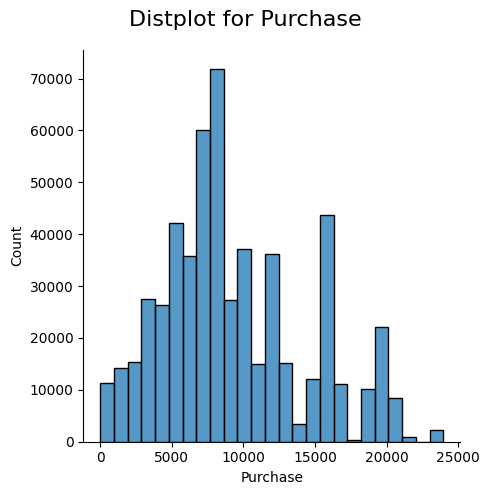

In [28]:
g = sns.displot(df_org, x="Purchase", bins=25)
g.fig.suptitle("Distplot for Purchase", fontsize=16)
g.fig.tight_layout()
g.fig.subplots_adjust(top=0.9)
plt.show()

- The most frequent purchase amount is around ₹8,000 to ₹9,000, with over 70,000 transactions, indicating a strong preference for mid-range products
- Most purchases fall between ₹0 and ₹15,000, while high-value transactions (above ₹20,000) are significantly fewer

**Business Insights:**
- Offer discounts or cashback on products priced ₹8,000–₹12,000 to leverage high demand.
- Introduce EMI/financing plans for products above ₹20,000 to increase their accessibility
- Prioritize inventory in the ₹5,000–₹15,000 range to align with consumer purchasing trends.




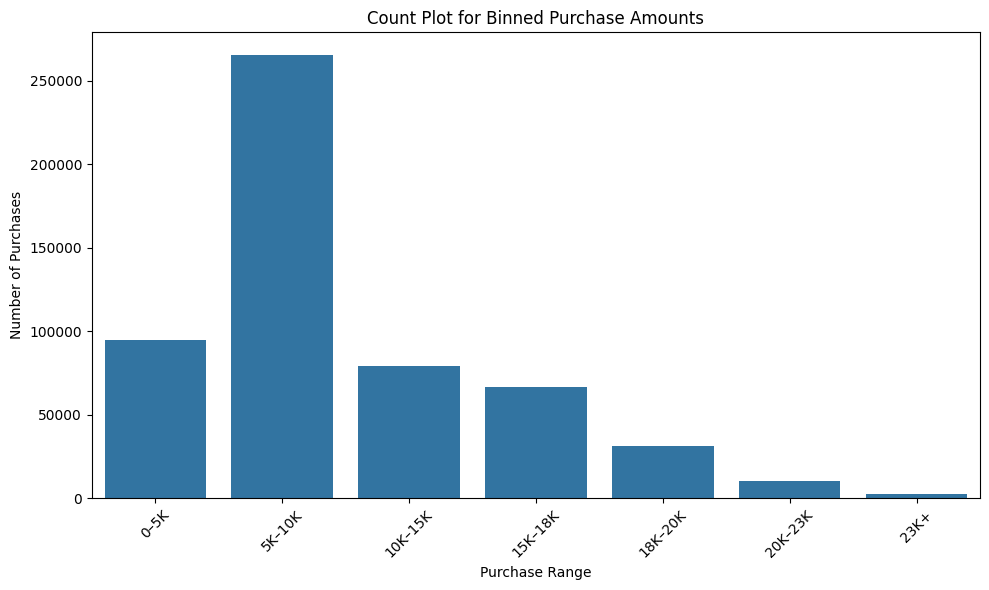

In [29]:
# Define custom bin edges since it is continuous data
bins = [0, 5000, 10000, 15000, 18000, 20000, 23000, 24000]
labels = ['0–5K', '5K–10K', '10K–15K', '15K–18K', '18K–20K', '20K–23K', '23K+']

# Create a new binned column
categorical_df['Purchase_Binned'] = pd.cut(categorical_df['Purchase'], bins=bins, labels=labels, include_lowest=True)

# Plot the countplot
plt.figure(figsize=(10, 6))
sns.countplot(x='Purchase_Binned', data=categorical_df)
plt.title("Count Plot for Binned Purchase Amounts")
plt.xlabel("Purchase Range")
plt.ylabel("Number of Purchases")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The highest number of transactions occurred in the 5K–10K range, followed by 0–5K and 10K–15K

Very few purchases exceed 20K, confirming that customers rarely buy premium-priced items

**Business Insights:**
*   Focus marketing campaigns on the ₹5K–₹15K bracket where customer activity is the highest
*   For the ₹0–₹5K range, consider bundling to increase average order value.
*   For purchases >20K, highlight premium value(exclusivity) or offer seasonal deals.


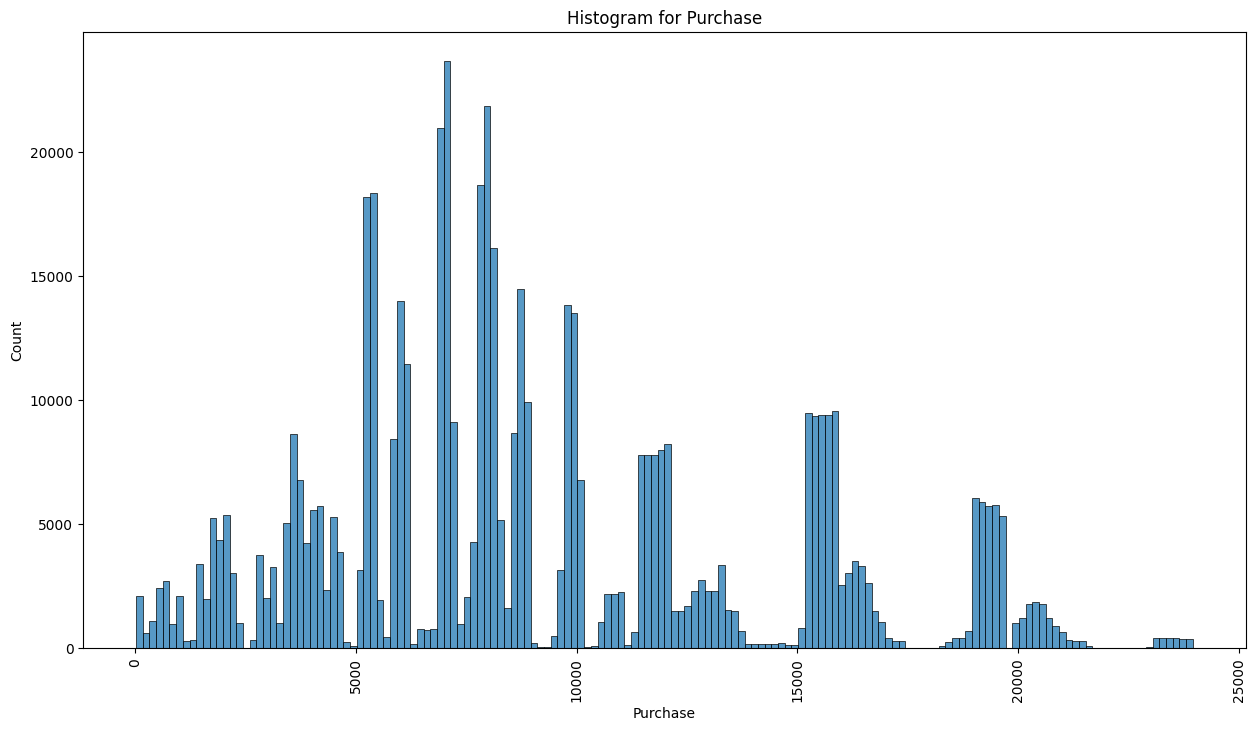

In [30]:
plt.figure(figsize=(15,8))
plt.title("Histogram for Purchase")
sns.histplot(x='Purchase',data=df_org)
plt.xticks(rotation=90)
plt.show()

This histogram reveals distinct purchase "spikes" at specific price points (e.g., around 5,000, 9,000, 15,000, and 20,000).

These spikes suggest that customers are frequently purchasing standard-priced items

**Business Implications:**
  - Identify products around popular spike points and ensure they are well-stocked and promoted.


###   Bivariate

### For categorical variable(s): Boxplot

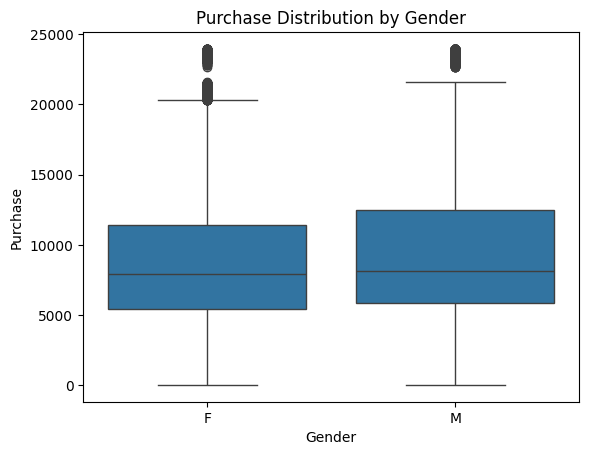

In [75]:
# Purchase vs Gender
sns.boxplot(x='Gender', y='Purchase', data=categorical_df)
plt.title("Purchase Distribution by Gender")
plt.show()

Median purchases for both males and females appear similar

Males exhibit slightly higher upper quartile values

Both genders show significant outliers above ₹20,000

**Business Implications:**

*   Marketing strategies can be largely gender-neutral, focusing more on product preference than spending power

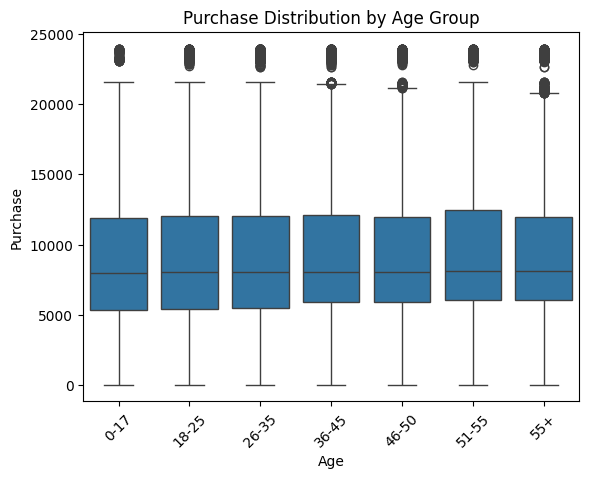

In [76]:
# Purchase vs Age
sns.boxplot(x='Age', y='Purchase', data=categorical_df)
plt.title("Purchase Distribution by Age Group")
plt.xticks(rotation=45)
plt.show()

All age groups have a similar median purchase value

The age group 51-55 shows a slightly higher upper quartile and a wider interquartile range (IQR)

Outliers are present in all age groups, especially between ₹20,000–₹24,000

**Business Implications:**
*   Customers aged 36–55 are likely key spenders therefore target this age group—especially in tech, lifestyle, or high-value goods.
*   For younger groups (18–35), introduce EMI, student discounts, or lower-entry products to increase engagement.

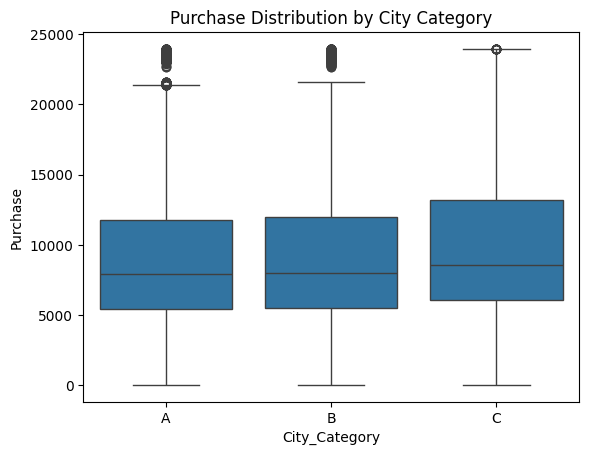

In [77]:
# Purchase vs City_Category
sns.boxplot(x='City_Category', y='Purchase', data=categorical_df)
plt.title("Purchase Distribution by City Category")
plt.show()

City Category C shows a slightly higher median and IQR than A and B.

All three city types have high-value outliers.

**Business Implications:**
*   Do not underestimate smaller cities (City C); they are strong contributors to revenue
*   Consider expanding distribution and targeting strategies in City C to capitalize on high average purchase behavior

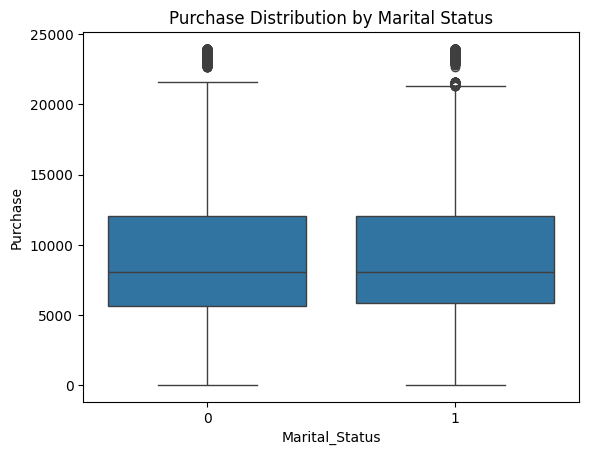

In [83]:
# Purchase vs Marital_Status
sns.boxplot(x='Marital_Status', y='Purchase', data=categorical_df)
plt.title("Purchase Distribution by Marital Status")
plt.show()

Marital status doesn’t seem to significantly affect purchase amounts

**Business Implication:**
*  For married customers, promote family-centric or couple-oriented deals.
*  For singles, consider lifestyle, travel, or self-care product promotions.

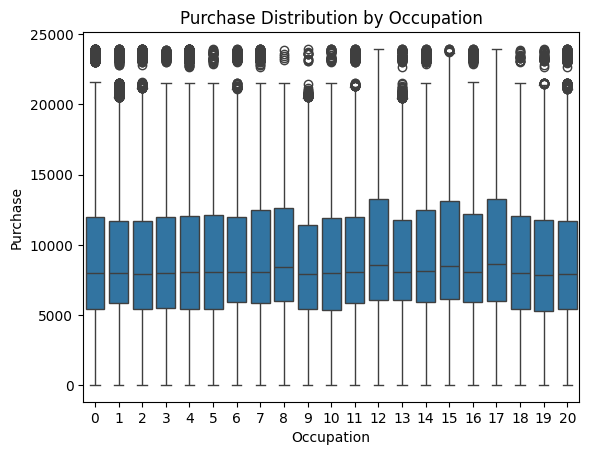

In [79]:
# Purchase vs Occupation
sns.boxplot(x='Occupation', y='Purchase', data=categorical_df)
plt.title("Purchase Distribution by Occupation")
plt.show()

Except for few (8,12,15,17) other occupation shows similar spending habit

Most purchases cluster around 5,000-12,500, signaling that customers are comfortable with mid-range spending

Except Occupation (12 and 17) other shows outliers

**Business Implications:**
*  Giving discounts on products priced just above ₹10,000 (like ₹12,000–₹14,000) can encourage customers to spend more

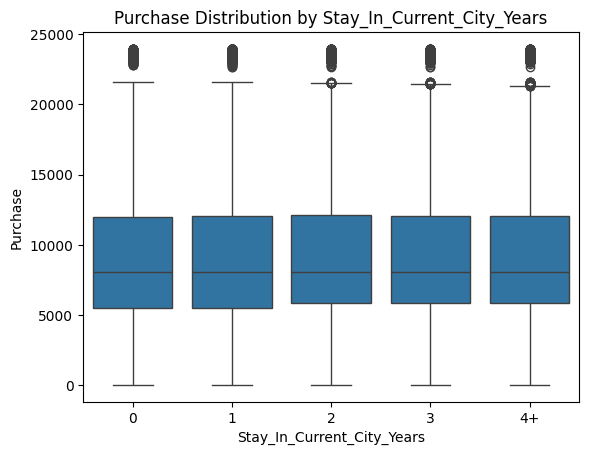

In [82]:
# Purchase vs Stay_In_Current_City_Years
sns.boxplot(x='Stay_In_Current_City_Years', y='Purchase', data=categorical_df)
plt.title("Purchase Distribution by Stay_In_Current_City_Years")
plt.show()

### For correlation: Heatmaps, Pairplots

In [32]:
df_final = df_org.copy()

# Encode categorical variables
df_final['Gender'] = df_final['Gender'].map({'M': 0, 'F': 1})
df_final['Age'] = df_final['Age'].map({
    '0-17': 0,
    '18-25': 1,
    '26-35': 2,
    '36-45': 3,
    '46-50': 4,
    '51-55': 5,
    '55+': 6
})
df_final['Stay_In_Current_City_Years'] = df_final['Stay_In_Current_City_Years'].replace({'4+': 5}).astype(int)
df_final['City_Category'] = df_final['City_Category'].map({'A': 1, 'B': 2, 'C': 3}).astype(int)

In [84]:
selectedcols_df = df_final[['Gender', 'Age','Occupation', 'City_Category', 'Purchase']]

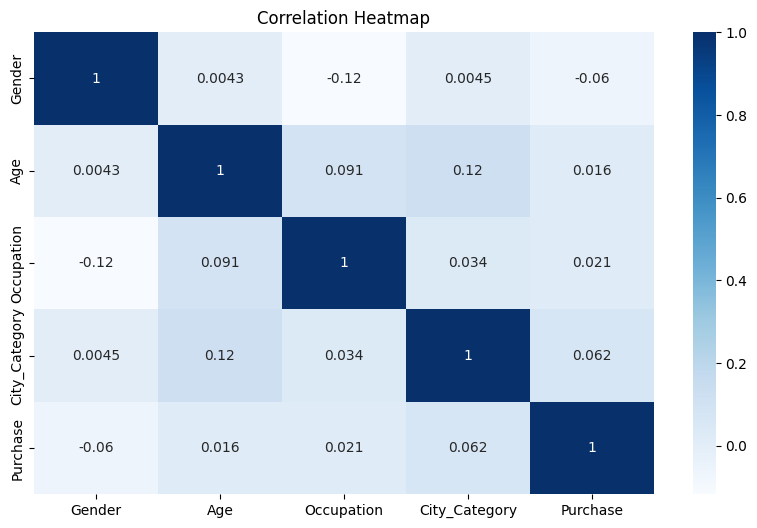

In [85]:
plt.figure(figsize=(10, 6))
sns.heatmap(selectedcols_df.corr(), annot=True, cmap='Blues')
plt.title("Correlation Heatmap")
plt.show()

Age and City_Category shows the strongest correlation.
**Business Implications:**
*  City Demographics Vary by Age:
   - Young professionals (26–35) may migrate to urban (City A) for jobs, while older customers may dominate semi-urban/rural areas (City B/C)
*  Business Action: Personalize marketing by combining city and age insights
   - Younger age group in urban cities → Promote tech, fashion, premium gadgets.
   - Older age group in non-metro areas → Promote value-for-money, home & family products.

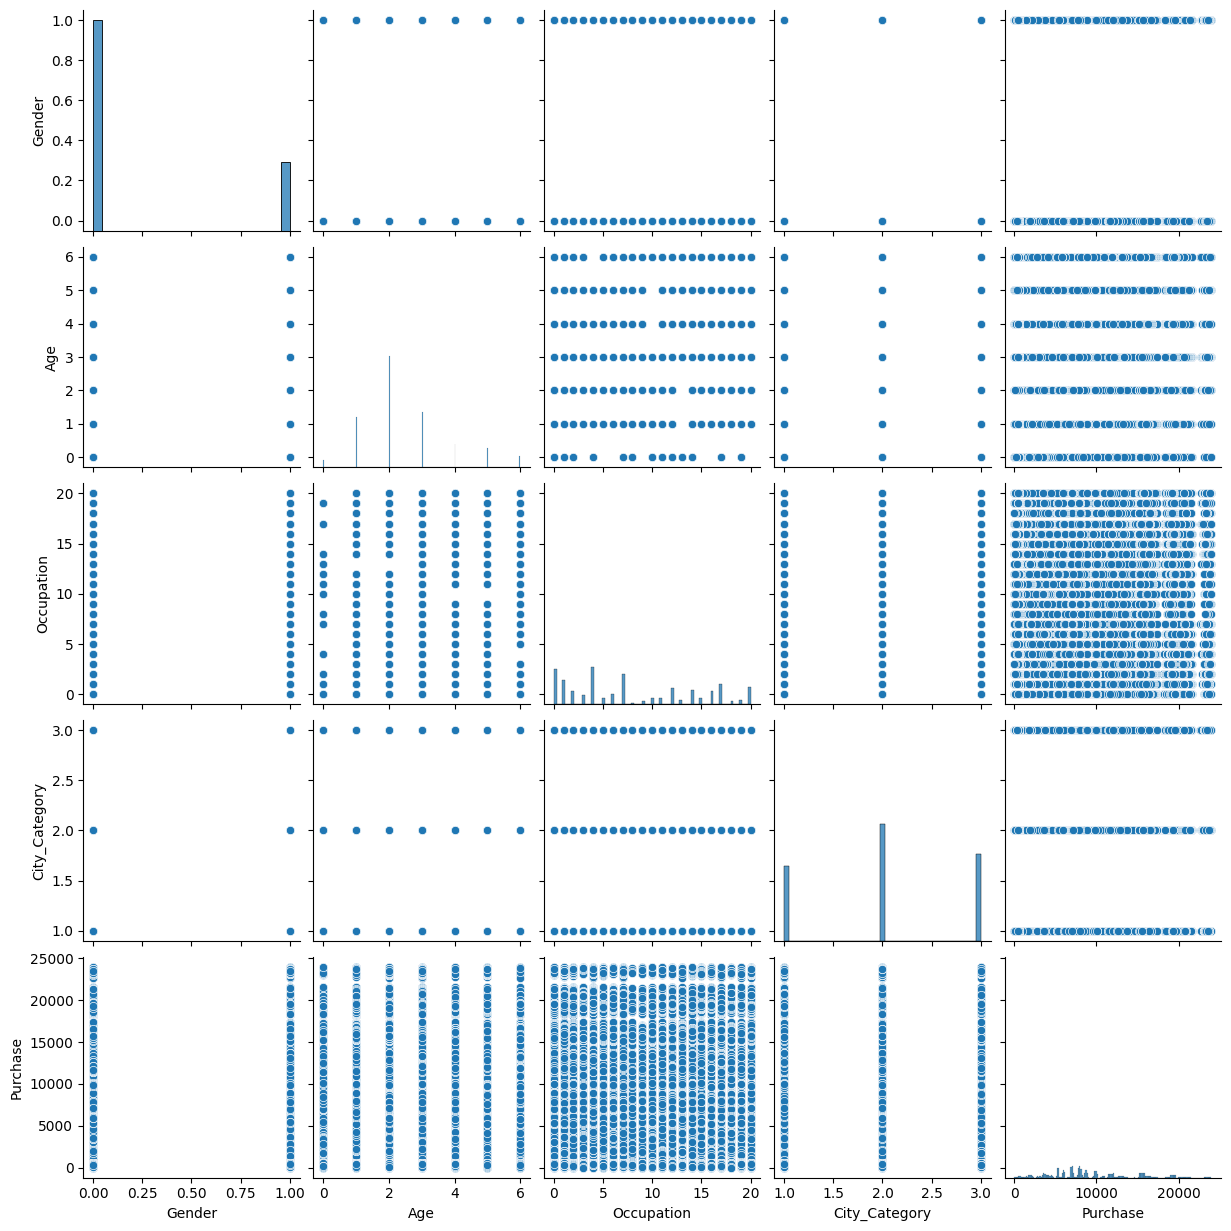

In [37]:
sns.pairplot(data=selectedcols_df)
plt.show()

###**What good looks like?**

###**2. Detect Null values & Outliers (using boxplot, “describe” method by checking the difference between mean and median, isnull etc.)**

In [87]:
# Detect null values
df_org.isnull().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category,0
Purchase,0


There are no null values in the dataset

In [89]:
#Fiind missing percentage
df_org.isnull().mean() * 100

,0
User_ID,0.0
Product_ID,0.0
Gender,0.0
Age,0.0
Occupation,0.0
City_Category,0.0
Stay_In_Current_City_Years,0.0
Marital_Status,0.0
Product_Category,0.0
Purchase,0.0


The dataset shows zero percent null values

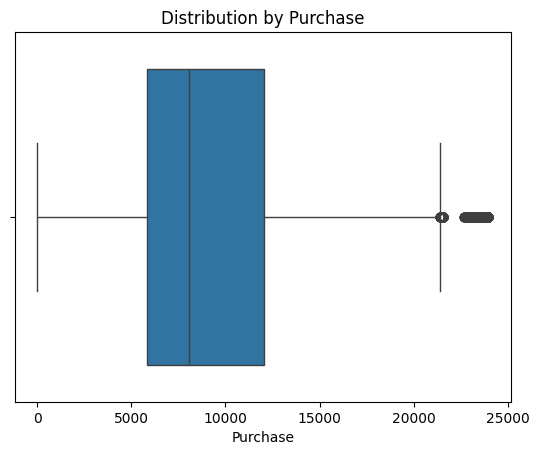

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64
Mean: 9263.968712959126
Median: 8047.0


In [91]:
# Detect outliers
sns.boxplot(x='Purchase', data=df_final)
plt.title("Distribution by Purchase")
plt.show()

# By describe method
print(df_final['Purchase'].describe())
print("Mean:", df_final['Purchase'].mean())
print("Median:", df_final['Purchase'].median())

Since the mean is higher than the median, it shows that some expensive purchases are increasing the average, which means there may be outliers in the data

##**Evaluation Criteria**

###**2. Missing Value & Outlier Detection**



Check how many missing values exist per column

In [38]:
df_org.isnull().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category,0
Purchase,0


There are no missing values

Check percentage of missing values

In [39]:
df_org.isnull().mean() * 100

,0
User_ID,0.0
Product_ID,0.0
Gender,0.0
Age,0.0
Occupation,0.0
City_Category,0.0
Stay_In_Current_City_Years,0.0
Marital_Status,0.0
Product_Category,0.0
Purchase,0.0


### Outlier detection

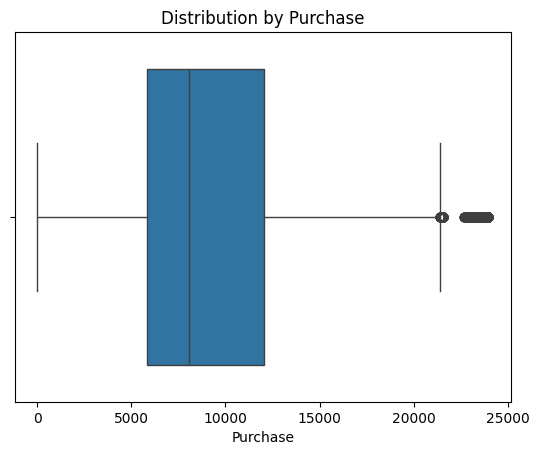

In [40]:
sns.boxplot(x='Purchase', data=df_final)
plt.title("Distribution by Purchase")
plt.show()

In [41]:
Q1 = df_final['Purchase'].quantile(0.25)
Q3 = df_final['Purchase'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = df_final[(df_final['Purchase'] < lower_bound) | (df_final['Purchase'] > upper_bound)]
print("Number of Purchase outliers (IQR):", len(outliers_iqr))

Number of Purchase outliers (IQR): 2677


There are 2677 outliers in the Purchase column

### Outlier Treatment

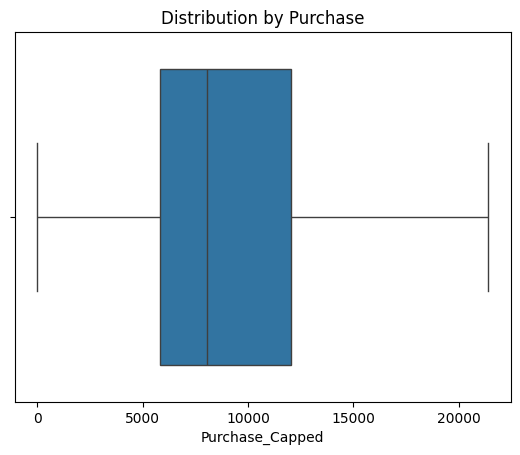

In [42]:
df_final['Purchase_Capped'] = np.clip(df_final['Purchase'], lower_bound, upper_bound)
sns.boxplot(x='Purchase_Capped', data=df_final)
plt.title("Distribution by Purchase")
plt.show()

**Conclusion:**

Out of 550,068 records, only 0.49% were outliers in the target variable **Purchase**. So, Instead of removing them, we created a capped version (**Purchase_Capped**) to retain original values for analysis while enabling robust modeling.

### **What good looks like?**

###**3. Do some data exploration steps like:**


### Tracking the amount spent per transaction of all the 50 million female customers, and all the 50 million male customers, calculate the average, and conclude the results.

In [43]:
average_purchase_by_gender = df_org.groupby('Gender')['Purchase'].mean()
print(average_purchase_by_gender)

Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64


**Conclusion**

The average purchase amount for male customers (₹9437.53) is higher than that for female customers (₹8734.57).
This suggests that male customers tend to spend more per transaction compared to female customers.

### Inference after computing the average female and male expenses.

**Inference:**

Walmart may consider tailoring marketing strategies or promotional offers to better engage high-spending male customers, while also exploring ways to boost spending among female customers.

###   Use the sample average to find out an interval within which the population average will lie.Using the sample of female customers you will calculate the interval within which the average spending of 50 million male and female customers may lie.

Considering a sample size of 30k and confidence level 0.95

In [44]:
sample_size = 30000
confidence_level = 0.95
sample_means_f = []
sample_means_m = []
# Generate 1000 sample means for male and female
for _ in range(1000):
  sample_f = df_org[df_org['Gender'] == 'F']['Purchase'].sample(sample_size, replace=True)
  sample_m = df_org[df_org['Gender'] == 'M']['Purchase'].sample(sample_size, replace=True)
  sample_means_f.append(sample_f.mean())
  sample_means_m.append(sample_m.mean())
sample_means_f = np.array(sample_means_f)
sample_means_m = np.array(sample_means_m)

z = stats.norm.ppf((1 + confidence_level) / 2)

# Compute CI for Female
mean_f = np.mean(sample_means_f)
std_f = np.std(sample_means_f)
lower_f = mean_f - z * std_f
upper_f = mean_f + z * std_f

# Compute CI for Male
mean_m = np.mean(sample_means_m)
std_m = np.std(sample_means_m)
lower_m = mean_m - z * std_m
upper_m = mean_m + z * std_m

print(f"Female: {int(confidence_level*100)}% CI: ₹({lower_f:.2f}, {upper_f:.2f}) | Mean: ₹{mean_f:.2f}")
print(f"Male: {int(confidence_level*100)}% CI: ₹({lower_m:.2f}, {upper_m:.2f}) | Mean: ₹{mean_m:.2f}")

Female: 95% CI: ₹(8680.10, 8790.61) | Mean: ₹8735.36
Male: 95% CI: ₹(9380.69, 9495.95) | Mean: ₹9438.32


The average spending of female customers is approximately ₹8,735, with a 95% confidence interval ranging from ₹8,680 to ₹8,791.

The average spending of male customers is higher, at around ₹9,438, with a 95% confidence interval ranging from ₹9,381 to ₹9,496.

###**4. Use the Central limit theorem to compute the interval. Change the sample size to observe the distribution of the mean of the expenses by female and male customers.:**


### The interval that you calculated is called Confidence Interval. The width of the interval is mostly decided by the business: Typically 90%, 95%, or 99%. Play around with the width parameter and report the observations.

Created a common function that will calculate the distribution mean based on different sample size and confidence level

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def clt_simulation_gender(sample_size, confidence_level):
  sample_means_f = []
  sample_means_m = []
  # Generate 1000 sample means for male and female
  for _ in range(1000):
    sample_f = df_org[df_org['Gender'] == 'F']['Purchase'].sample(sample_size, replace=True)
    sample_m = df_org[df_org['Gender'] == 'M']['Purchase'].sample(sample_size, replace=True)
    sample_means_f.append(sample_f.mean())
    sample_means_m.append(sample_m.mean())
  sample_means_f = np.array(sample_means_f)
  sample_means_m = np.array(sample_means_m)

  z = stats.norm.ppf((1 + confidence_level) / 2)

  # Compute CI for Female
  mean_f = np.mean(sample_means_f)
  std_f = np.std(sample_means_f)
  lower_f = mean_f - z * std_f
  upper_f = mean_f + z * std_f

  # Compute CI for Male
  mean_m = np.mean(sample_means_m)
  std_m = np.std(sample_means_m)
  lower_m = mean_m - z * std_m
  upper_m = mean_m + z * std_m

  print(f"Female: {int(confidence_level*100)}% CI: ₹({lower_f:.2f}, {upper_f:.2f}) | Mean: ₹{mean_f:.2f}")
  print(f"Male: {int(confidence_level*100)}% CI: ₹({lower_m:.2f}, {upper_m:.2f}) | Mean: ₹{mean_m:.2f}")

  plt.figure(figsize=(10, 5))
  plt.hist(sample_means_f, bins=30, alpha=0.6, label='Female', color='skyblue')
  plt.hist(sample_means_m, bins=30, alpha=0.6, label='Male', color='salmon')

  # Plot CI lines
  plt.axvline(lower_f, color='blue', linestyle='--', label=f'Female {int(confidence_level*100)}% CI')
  plt.axvline(upper_f, color='blue', linestyle='--')
  plt.axvline(lower_m, color='red', linestyle='--', label=f'Male {int(confidence_level*100)}% CI')
  plt.axvline(upper_m, color='red', linestyle='--')

  # Mean lines
  plt.axvline(mean_f, color='blue', linestyle='-', label='Female Mean')
  plt.axvline(mean_m, color='red', linestyle='-', label='Male Mean')

  plt.title(f'Sample Size: {sample_size} | Confidence Level: {int(confidence_level*100)}%')
  plt.xlabel('Sample Mean of Purchase')
  plt.ylabel('Frequency')
  plt.legend()
  plt.tight_layout()
  plt.show()

### Sample size 300, Confidence level = 0.90

Female: 90% CI: ₹(8290.28, 9176.07) | Mean: ₹8733.18
Male: 90% CI: ₹(8948.52, 9930.58) | Mean: ₹9439.55


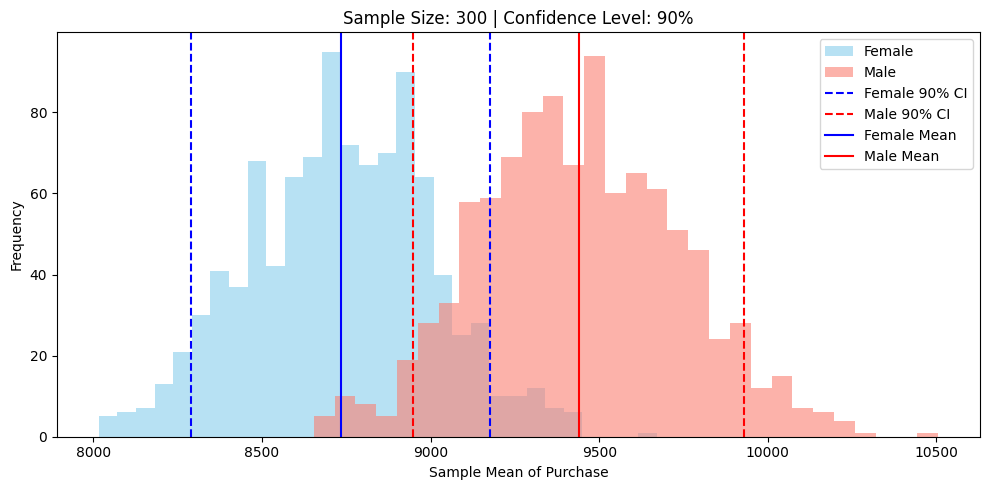

In [46]:
clt_simulation_gender(sample_size=300, confidence_level=0.90)

### Sample size 3000, Confidence level = 0.90

Female: 90% CI: ₹(8596.17, 8876.81) | Mean: ₹8736.49
Male: 90% CI: ₹(9283.75, 9595.34) | Mean: ₹9439.55


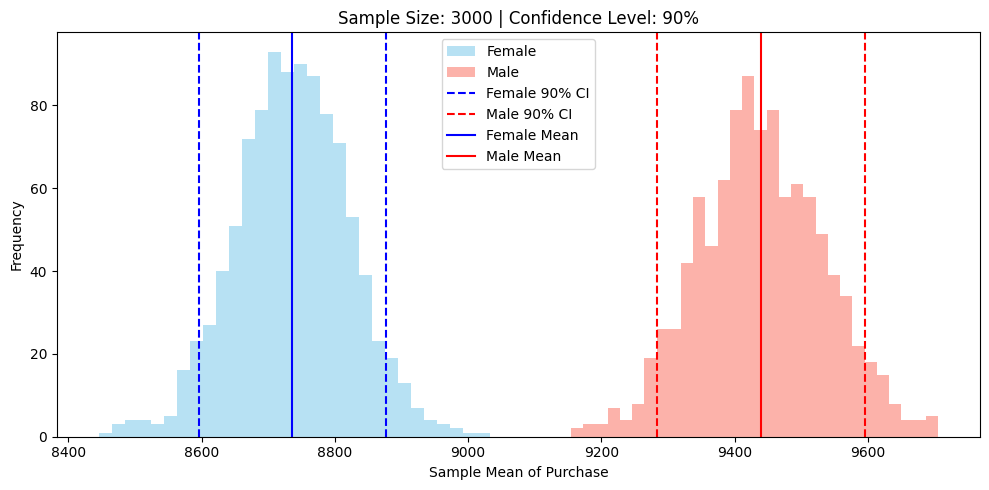

In [47]:
clt_simulation_gender(sample_size=3000, confidence_level=0.90)

### Sample size 30000, Confidence level = 0.90

Female: 90% CI: ₹(8688.79, 8778.62) | Mean: ₹8733.71
Male: 90% CI: ₹(9388.76, 9486.70) | Mean: ₹9437.73


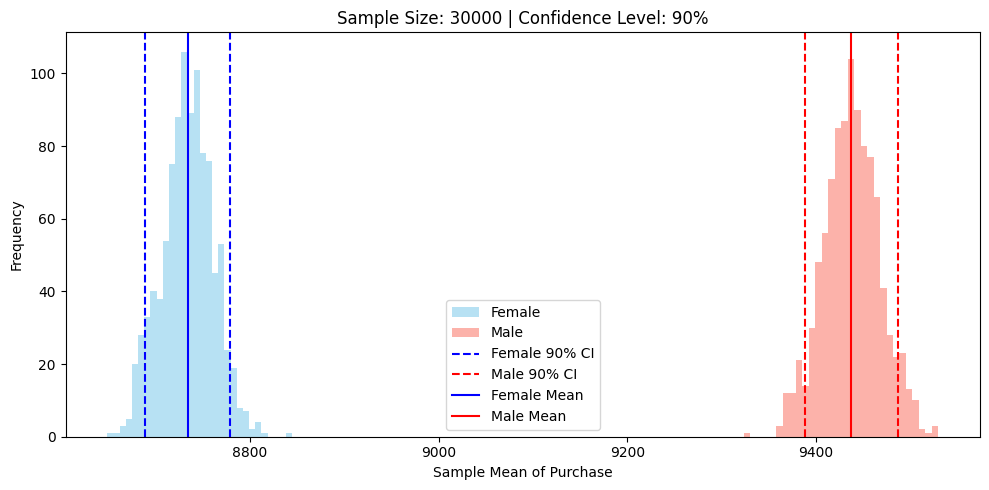

In [48]:
clt_simulation_gender(sample_size=30000, confidence_level=0.90)

### Sample size 300, Confidence level = 0.95

Female: 95% CI: ₹(8201.99, 9265.85) | Mean: ₹8733.92
Male: 95% CI: ₹(8851.01, 10026.98) | Mean: ₹9438.99


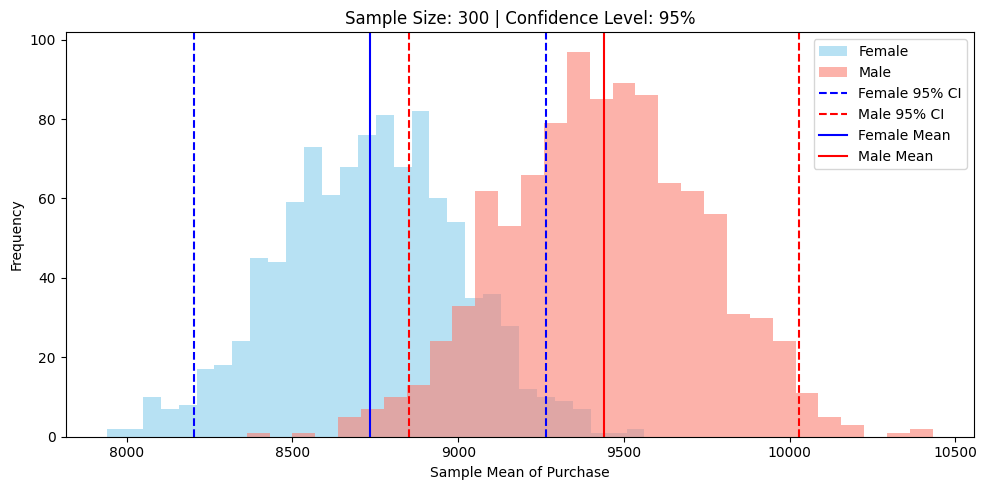

In [49]:
clt_simulation_gender(sample_size=300, confidence_level=0.95)

### Sample size 3000, Confidence level = 0.95

Female: 95% CI: ₹(8558.58, 8910.35) | Mean: ₹8734.46
Male: 95% CI: ₹(9257.05, 9627.45) | Mean: ₹9442.25


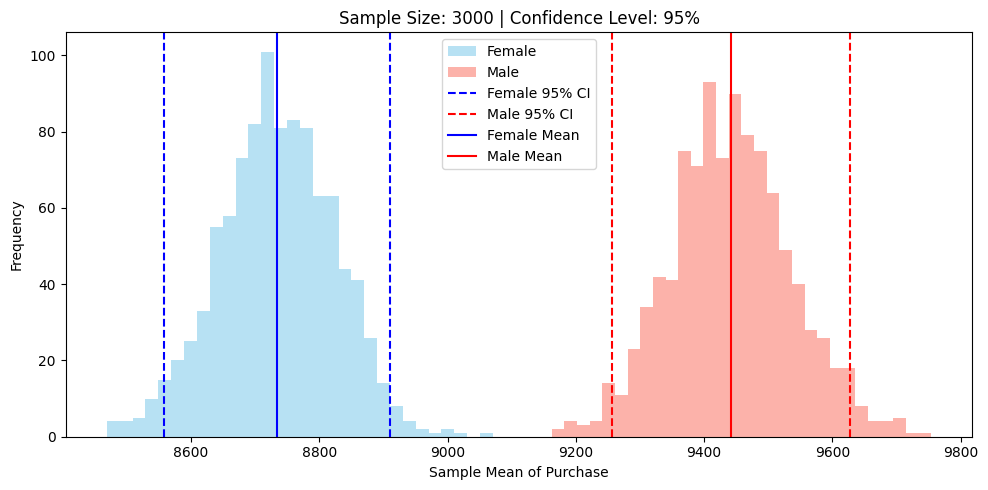

In [50]:
clt_simulation_gender(sample_size=3000, confidence_level=0.95)

### Sample size 30000, Confidence level = 0.95

Female: 95% CI: ₹(8682.82, 8786.73) | Mean: ₹8734.78
Male: 95% CI: ₹(9380.87, 9492.37) | Mean: ₹9436.62


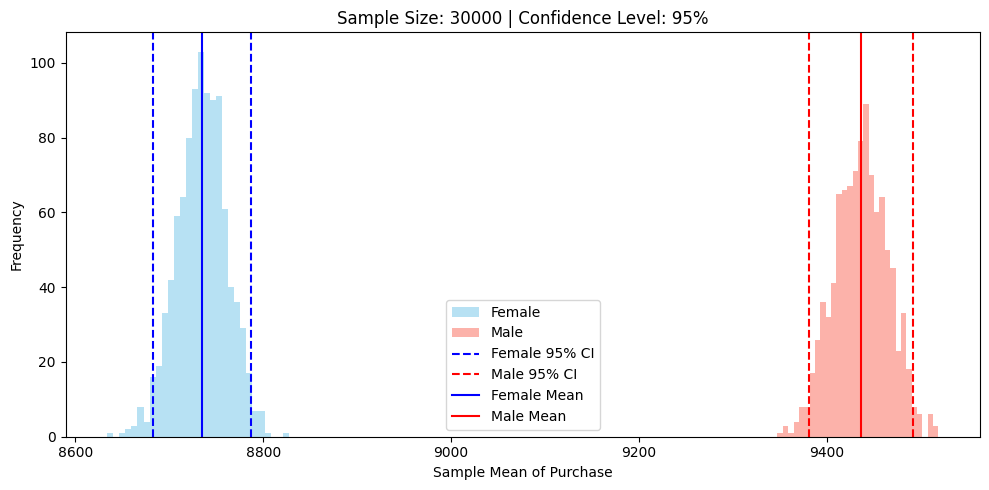

In [51]:
clt_simulation_gender(sample_size=30000, confidence_level=0.95)

### Sample size 300, Confidence level = 0.99

Female: 99% CI: ₹(8015.33, 9444.77) | Mean: ₹8730.05
Male: 99% CI: ₹(8664.83, 10202.15) | Mean: ₹9433.49


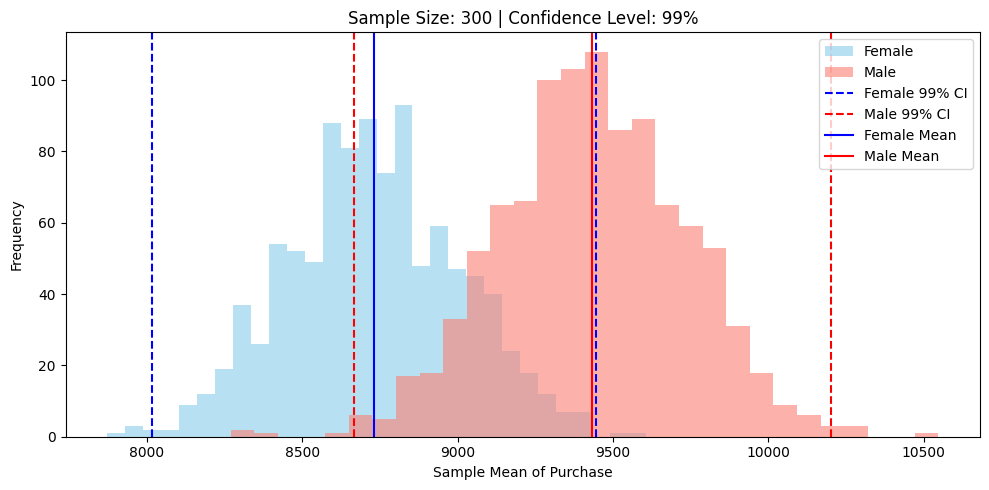

In [52]:
clt_simulation_gender(sample_size=300, confidence_level=0.99)

### Sample size 3000, Confidence level = 0.99

Female: 99% CI: ₹(8505.04, 8968.85) | Mean: ₹8736.95
Male: 99% CI: ₹(9198.82, 9676.36) | Mean: ₹9437.59


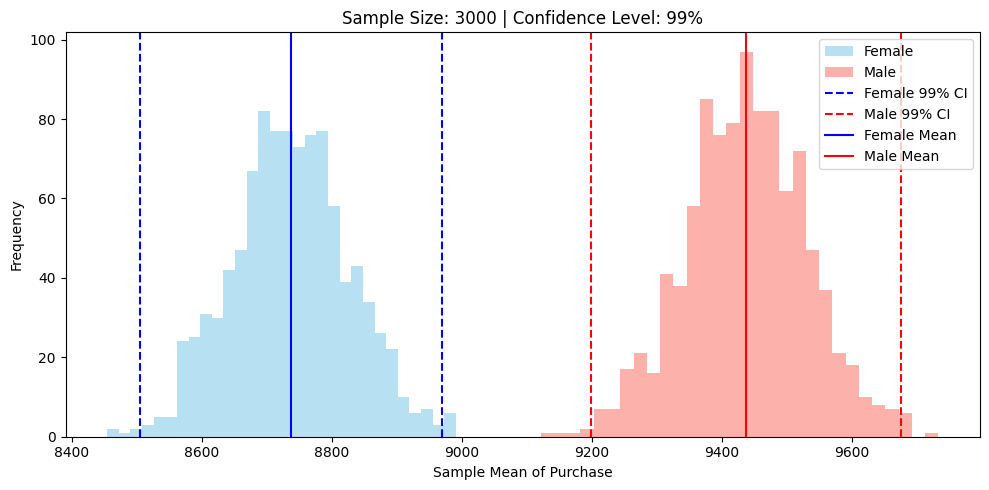

In [53]:
clt_simulation_gender(sample_size=3000, confidence_level=0.99)

### Sample size 30000, Confidence level = 0.99

Female: 99% CI: ₹(8665.62, 8805.68) | Mean: ₹8735.65
Male: 99% CI: ₹(9360.11, 9511.83) | Mean: ₹9435.97


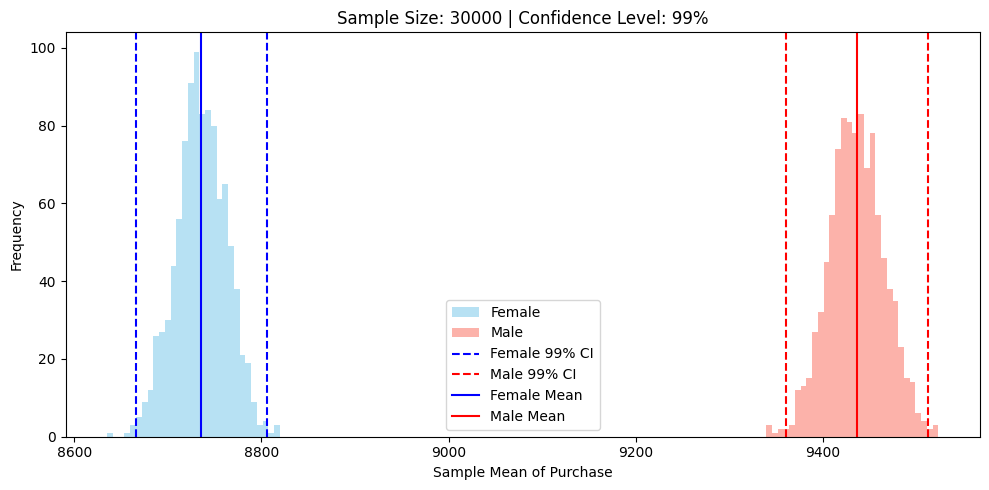

In [54]:
clt_simulation_gender(sample_size=30000, confidence_level=0.99)

**Observations:**

*  As sample size increases, the confidence intervals become narrower, indicating more precise estimates of the average spending.
  - Example (Female, 90% CI):

  - n = 300 → ₹(8290.28, 9176.07) → Width ≈ 886

  - n = 3000 → ₹(8596.17, 8876.81) → Width ≈ 280

  - n = 30000 → ₹(8688.79, 8778.62) → Width ≈ 90
*  As confidence level increases (from 90% to 95% to 99%), the width of CIs increases
  - Example (Female, n = 300):

  - 90% CI: ₹(8290.28, 9176.07) → Width ≈ 886

  - 95% CI: ₹(8201.99, 9265.85) → Width ≈ 1064

  - 99% CI: ₹(8015.33, 9444.77) → Width ≈ 1429
*  Across all cases, male customers consistently spend more than female customers.

###**5. Conclude the results and check if the confidence intervals of average male and female spends are overlapping or not overlapping. How can Walmart leverage this conclusion to make changes or improvements?**

Overlapping?
*  Based on the analysis of the data, For the largest sample (30,000), 90% CI
   - Female: 90% CI: ₹(8688.79, 8778.62) | Mean: ₹8733.71
   - Male: 90% CI: ₹(9388.76, 9486.70) | Mean: ₹9437.73
*  These intervals do NOT overlap — the female upper bound is ~₹8778, male lower bound is ~₹9388
*  Same applies at 95% and 99% confidence levels and large sample sizes — no overlap.
*  For smaller sample sizes (300), intervals are wider, but still no overlap:
   - Female (90% CI): ₹(8290.28, 9176.07)
   - Male (90% CI): ₹(8948.52, 9930.58)
   -These have a very small possible overlap region between 8948 and 9176, but mostly are distinct.
*  For smaller samples and higher confidence intervals (e.g., 99%), there may be some overlap due to higher uncertainty, but with more data, the distinction becomes clearer.

Walmart can leverage this conclusion and make below improvements:
*  Since males have a consistently higher average spending than females, Walmart can:
  - Tailor marketing and promotions: Create gender-specific campaigns focusing on product categories where males spend more or respond better.
  - Optimize inventory: Stock more products favored by the higher spending group (males), or promote products to females to encourage increased spending.
  - Personalized offers: Use this spending difference to design loyalty rewards, discounts, or bundles that appeal differently to men and women.
  - Analyze product preferences further: Understand which products contribute to this spending gap and target those with customized messaging.

###**6. Perform the same activity for Married vs Unmarried and Age**

### For Age, you can try bins based on life stages: 0-17, 18-25, 26-35, 36-50, 51+ years.

### Marital Status vs Purchase

Created a common function that will calculate the distribution mean based on different sample size and confidence level

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def clt_simulation_marital_status(sample_size, confidence_level):
  sample_means_um = []
  sample_means_ma = []
  # Generate 1000 sample means for male and female
  for _ in range(1000):
    sample_um = df_org[df_org['Marital_Status'] == 0]['Purchase'].sample(sample_size, replace=True)
    sample_ma = df_org[df_org['Marital_Status'] == 1]['Purchase'].sample(sample_size, replace=True)
    sample_means_um.append(sample_um.mean())
    sample_means_ma.append(sample_ma.mean())
  sample_means_um = np.array(sample_means_um)
  sample_means_ma = np.array(sample_means_ma)

  z = stats.norm.ppf((1 + confidence_level) / 2)

  # Compute CI for Unmarried
  mean_um = np.mean(sample_means_um)
  std_um = np.std(sample_means_um)
  lower_um = mean_um - z * std_um
  upper_um = mean_um + z * std_um

  # Compute CI for Married
  mean_ma = np.mean(sample_means_ma)
  std_ma = np.std(sample_means_ma)
  lower_ma = mean_ma - z * std_ma
  upper_ma = mean_ma + z * std_ma

  print(f"Unmarried: {int(confidence_level*100)}% CI: ₹({lower_um:.2f}, {upper_um:.2f}) | Mean: ₹{mean_um:.2f}")
  print(f"Married: {int(confidence_level*100)}% CI: ₹({lower_ma:.2f}, {upper_ma:.2f}) | Mean: ₹{mean_ma:.2f}")

  plt.figure(figsize=(10, 5))
  plt.hist(sample_means_um, bins=30, alpha=0.6, label='Unmarried', color='skyblue')
  plt.hist(sample_means_ma, bins=30, alpha=0.6, label='Married', color='salmon')

  # Plot CI lines
  plt.axvline(lower_um, color='blue', linestyle='--', label=f'Unmarried {int(confidence_level*100)}% CI')
  plt.axvline(upper_um, color='blue', linestyle='--')
  plt.axvline(lower_ma, color='red', linestyle='--', label=f'Married {int(confidence_level*100)}% CI')
  plt.axvline(upper_ma, color='red', linestyle='--')

  # Mean lines
  plt.axvline(mean_um, color='blue', linestyle='-', label='Unmarried Mean')
  plt.axvline(mean_ma, color='red', linestyle='-', label='Married Mean')

  plt.title(f'Sample Size: {sample_size} | Confidence Level: {int(confidence_level*100)}%')
  plt.xlabel('Sample Mean of Purchase')
  plt.ylabel('Frequency')
  plt.legend()
  plt.tight_layout()
  plt.show()

### Sample size = 300, Confidence level= 0.90

Unmarried: 90% CI: ₹(8788.94, 9744.48) | Mean: ₹9266.71
Married: 90% CI: ₹(8772.91, 9715.68) | Mean: ₹9244.30


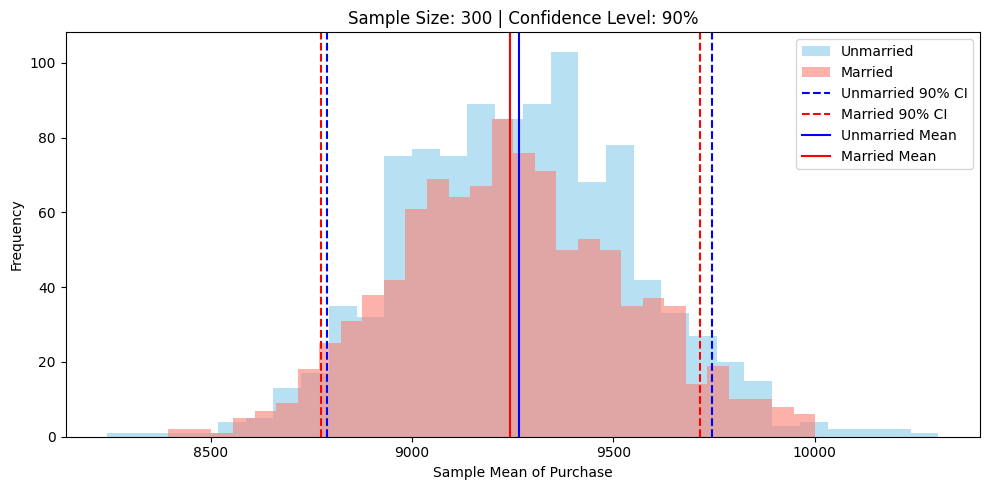

In [56]:
clt_simulation_marital_status(sample_size=300, confidence_level=0.90)

### Sample size 3000, Confidence level = 0.90

Unmarried: 90% CI: ₹(9110.48, 9423.15) | Mean: ₹9266.81
Married: 90% CI: ₹(9108.67, 9413.77) | Mean: ₹9261.22


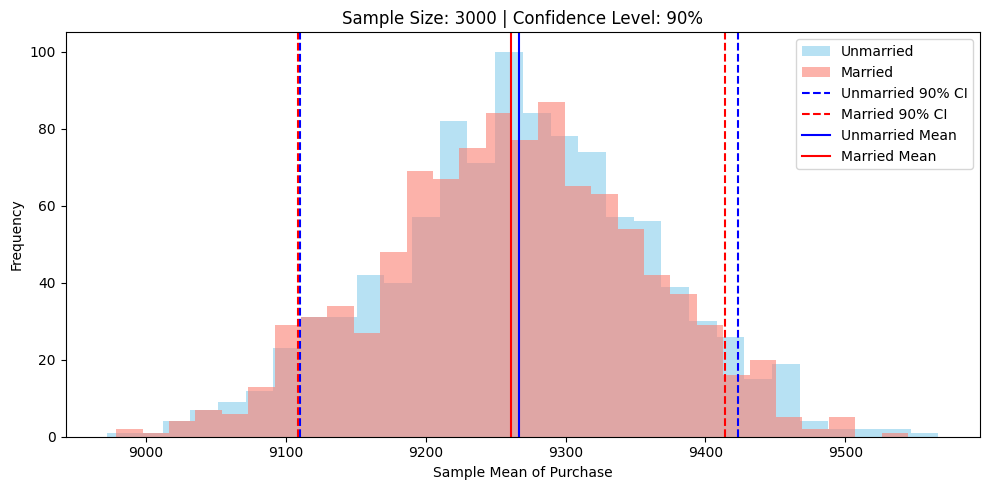

In [57]:
clt_simulation_marital_status(sample_size=3000, confidence_level=0.90)

### Sample size 30000, Confidence level = 0.90

Unmarried: 90% CI: ₹(9221.54, 9312.80) | Mean: ₹9267.17
Married: 90% CI: ₹(9212.87, 9307.35) | Mean: ₹9260.11


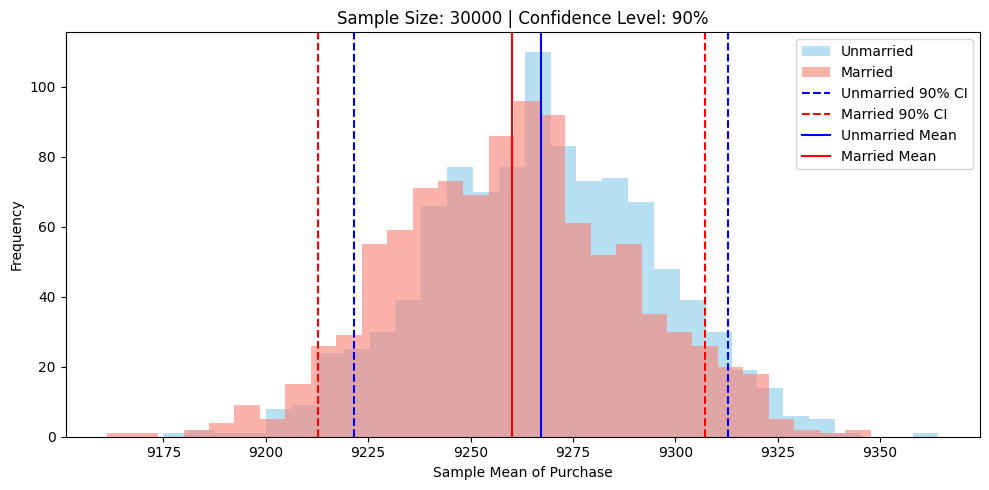

In [58]:
clt_simulation_marital_status(sample_size=30000, confidence_level=0.90)

### Sample size 300, Confidence level = 0.95

Unmarried: 95% CI: ₹(8719.38, 9828.79) | Mean: ₹9274.08
Married: 95% CI: ₹(8715.98, 9831.07) | Mean: ₹9273.53


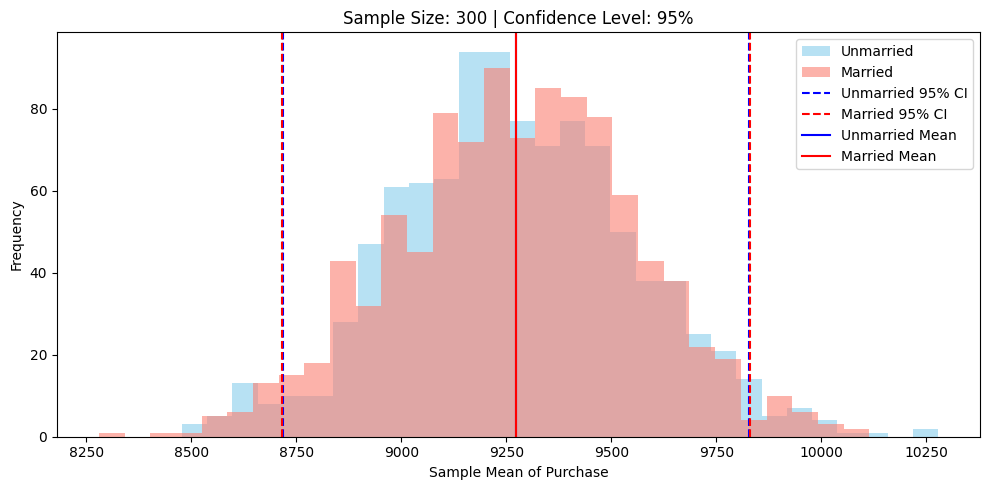

In [59]:
clt_simulation_marital_status(sample_size=300, confidence_level=0.95)

### Sample size 3000, Confidence level = 0.95

Unmarried: 95% CI: ₹(9084.02, 9454.54) | Mean: ₹9269.28
Married: 95% CI: ₹(9085.59, 9434.71) | Mean: ₹9260.15


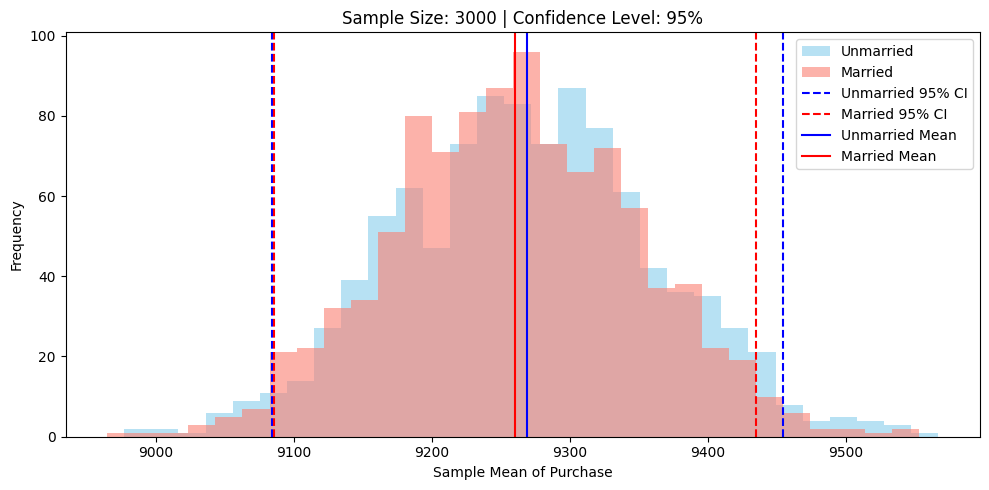

In [60]:
clt_simulation_marital_status(sample_size=3000, confidence_level=0.95)

### Sample size 30000, Confidence level = 0.95

Unmarried: 95% CI: ₹(9208.80, 9322.31) | Mean: ₹9265.55
Married: 95% CI: ₹(9204.63, 9316.80) | Mean: ₹9260.72


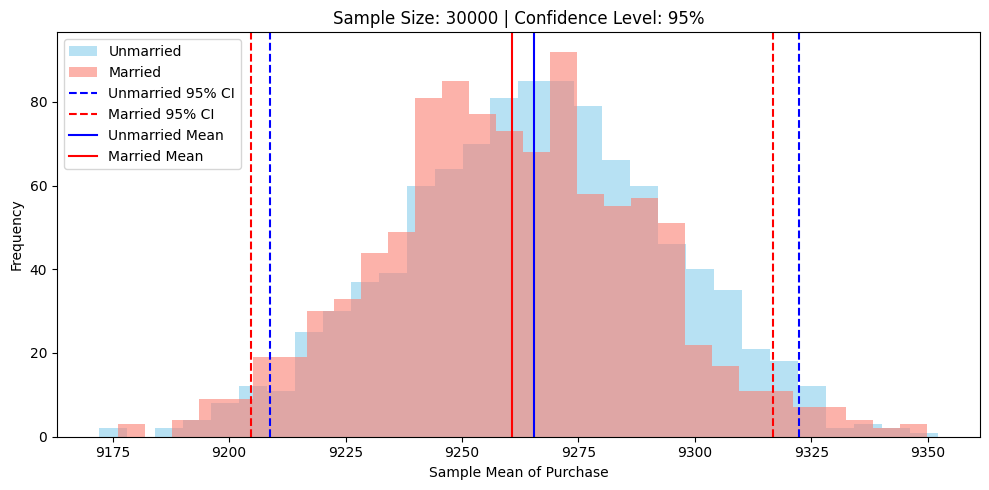

In [61]:
clt_simulation_marital_status(sample_size=30000, confidence_level=0.95)

### Sample size 300, Confidence level = 0.99

Unmarried: 99% CI: ₹(8490.31, 10021.07) | Mean: ₹9255.69
Married: 99% CI: ₹(8537.33, 9976.17) | Mean: ₹9256.75


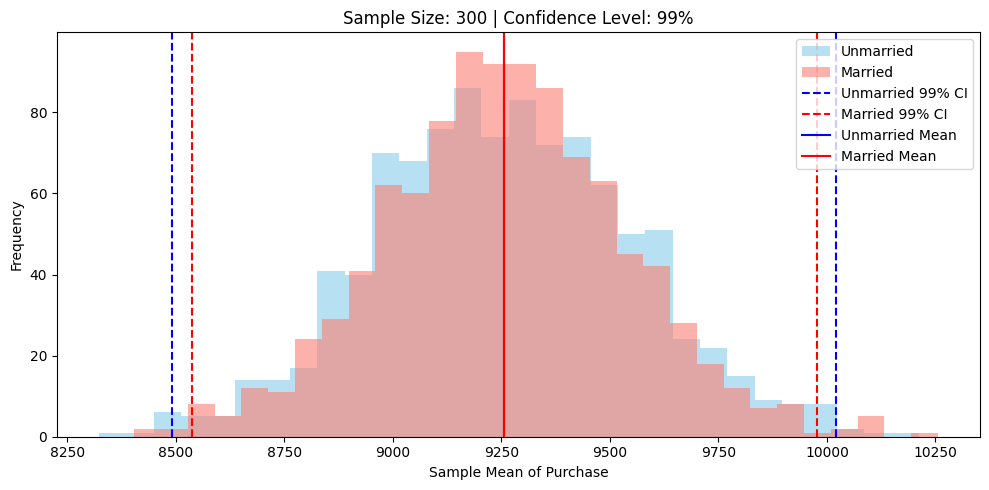

In [62]:
clt_simulation_marital_status(sample_size=300, confidence_level=0.99)

### Sample size 3000, Confidence level = 0.99

Unmarried: 99% CI: ₹(9039.17, 9502.64) | Mean: ₹9270.90
Married: 99% CI: ₹(9025.36, 9492.07) | Mean: ₹9258.71


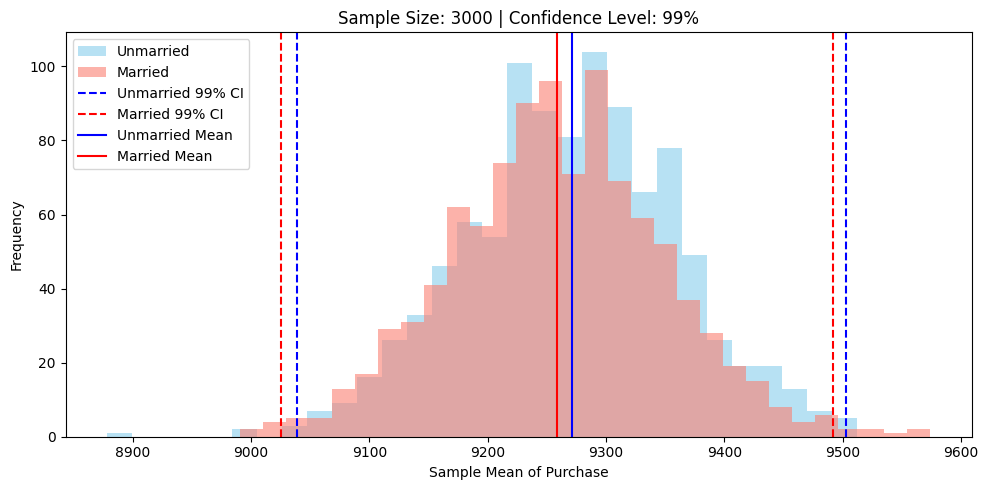

In [63]:
clt_simulation_marital_status(sample_size=3000, confidence_level=0.99)

### Sample size 30000, Confidence level = 0.99

Unmarried: 99% CI: ₹(9191.26, 9338.42) | Mean: ₹9264.84
Married: 99% CI: ₹(9186.81, 9336.17) | Mean: ₹9261.49


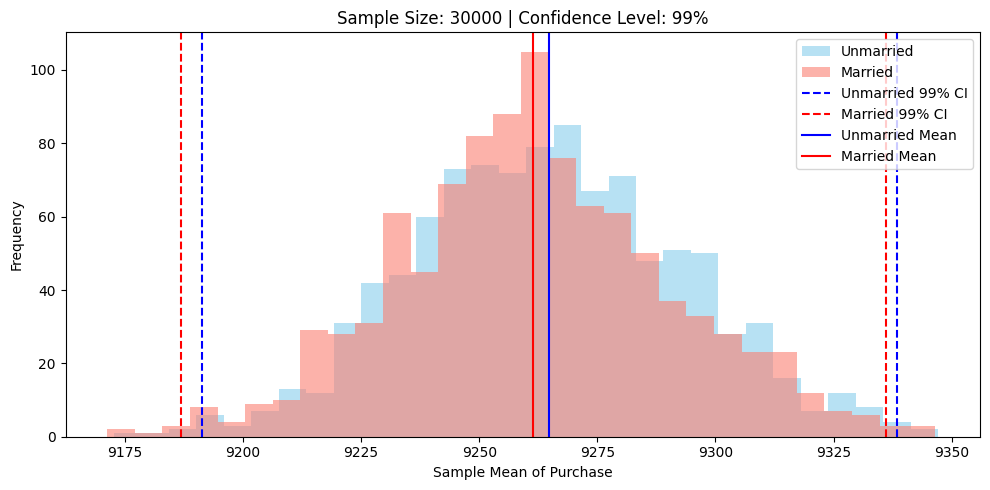

In [64]:
clt_simulation_marital_status(sample_size=30000, confidence_level=0.99)

### Age vs Purchase

Created a common function that will calculate the distribution mean based on different sample size and confidence level

In [65]:
def clt_simulation_age_all_in_one(sample_size, confidence_level):
    age_groups = df_org['Age'].unique()
    colors = plt.cm.Set2.colors  # Choose a color palette
    z = stats.norm.ppf((1 + confidence_level) / 2)

    plt.figure(figsize=(12, 6))

    for i, age_group in enumerate(sorted(age_groups)):
        sample_means = []

        for _ in range(1000):
            sample = df_org[df_org['Age'] == age_group]['Purchase'].sample(sample_size, replace=True)
            sample_means.append(sample.mean())

        sample_means = np.array(sample_means)
        mean_val = np.mean(sample_means)
        std_val = np.std(sample_means)
        lower = mean_val - z * std_val
        upper = mean_val + z * std_val

        # Print confidence interval details
        print(f"Age Group: {age_group} | {int(confidence_level*100)}% CI: ₹({lower:.2f}, {upper:.2f}) | Mean: ₹{mean_val:.2f}")

        # Plot histogram for this age group
        plt.hist(sample_means, bins=30, alpha=0.5, label=f'{age_group}', color=colors[i % len(colors)])

        # Optional: Plot mean lines for clarity
        plt.axvline(mean_val, linestyle='--', color=colors[i % len(colors)], linewidth=1)

    plt.title(f'Sample Size: {sample_size} | Confidence Level: {int(confidence_level*100)}% (All Age Groups)')
    plt.xlabel('Sample Mean of Purchase')
    plt.ylabel('Frequency')
    plt.legend(title='Age Group')
    plt.tight_layout()
    plt.show()

### Sample size 300, Confidence level = 0.90

Age Group: 0-17 | 90% CI: ₹(8450.08, 9414.21) | Mean: ₹8932.15
Age Group: 18-25 | 90% CI: ₹(8695.34, 9644.90) | Mean: ₹9170.12
Age Group: 26-35 | 90% CI: ₹(8781.43, 9718.10) | Mean: ₹9249.76
Age Group: 36-45 | 90% CI: ₹(8831.72, 9793.12) | Mean: ₹9312.42
Age Group: 46-50 | 90% CI: ₹(8739.65, 9699.06) | Mean: ₹9219.35
Age Group: 51-55 | 90% CI: ₹(9059.22, 10023.56) | Mean: ₹9541.39
Age Group: 55+ | 90% CI: ₹(8845.40, 9784.25) | Mean: ₹9314.83


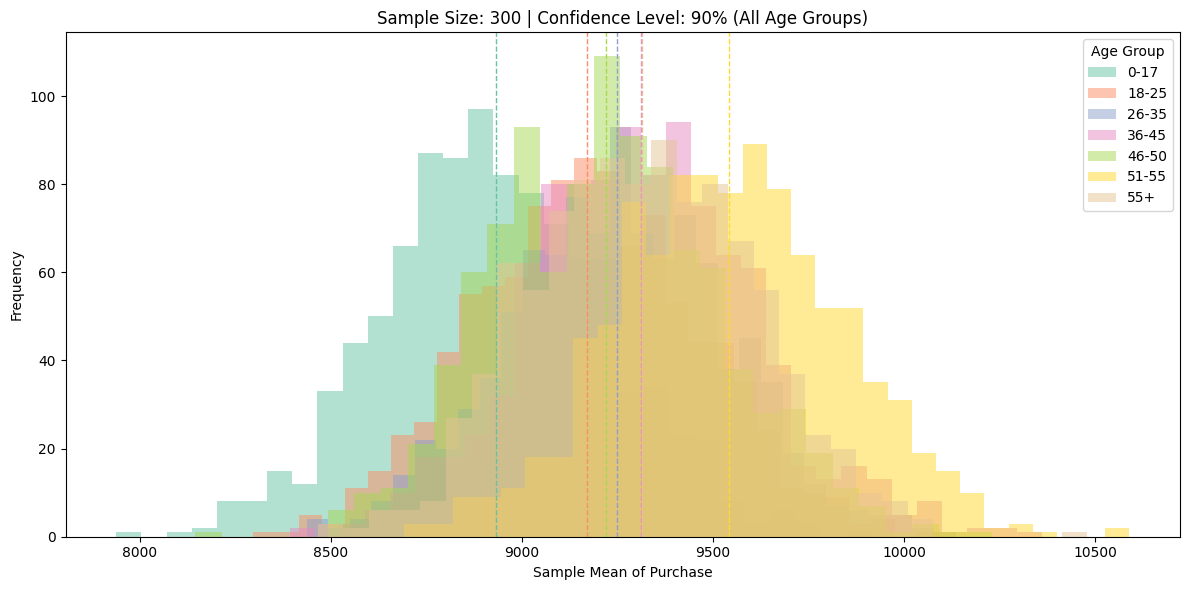

In [66]:
clt_simulation_age_all_in_one(sample_size=300, confidence_level=0.90)

### Sample size 3000, Confidence level = 0.90

Age Group: 0-17 | 90% CI: ₹(8778.09, 9083.87) | Mean: ₹8930.98
Age Group: 18-25 | 90% CI: ₹(9014.61, 9320.61) | Mean: ₹9167.61
Age Group: 26-35 | 90% CI: ₹(9105.59, 9409.55) | Mean: ₹9257.57
Age Group: 36-45 | 90% CI: ₹(9178.64, 9481.30) | Mean: ₹9329.97
Age Group: 46-50 | 90% CI: ₹(9064.25, 9355.75) | Mean: ₹9210.00
Age Group: 51-55 | 90% CI: ₹(9383.94, 9694.32) | Mean: ₹9539.13
Age Group: 55+ | 90% CI: ₹(9187.30, 9482.73) | Mean: ₹9335.02


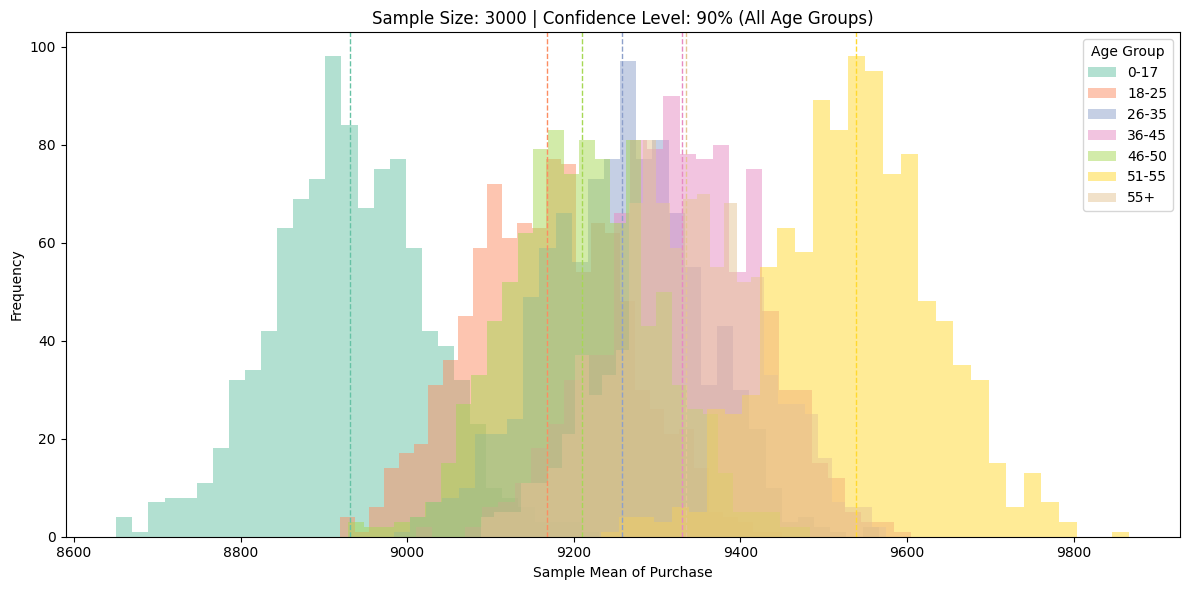

In [67]:
clt_simulation_age_all_in_one(sample_size=3000, confidence_level=0.90)

### Sample size 30000, Confidence level = 0.90

Age Group: 0-17 | 90% CI: ₹(8886.49, 8981.31) | Mean: ₹8933.90
Age Group: 18-25 | 90% CI: ₹(9121.33, 9216.48) | Mean: ₹9168.90
Age Group: 26-35 | 90% CI: ₹(9203.08, 9298.16) | Mean: ₹9250.62
Age Group: 36-45 | 90% CI: ₹(9283.27, 9377.54) | Mean: ₹9330.40
Age Group: 46-50 | 90% CI: ₹(9163.27, 9254.02) | Mean: ₹9208.65
Age Group: 51-55 | 90% CI: ₹(9486.79, 9584.67) | Mean: ₹9535.73
Age Group: 55+ | 90% CI: ₹(9287.62, 9385.43) | Mean: ₹9336.52


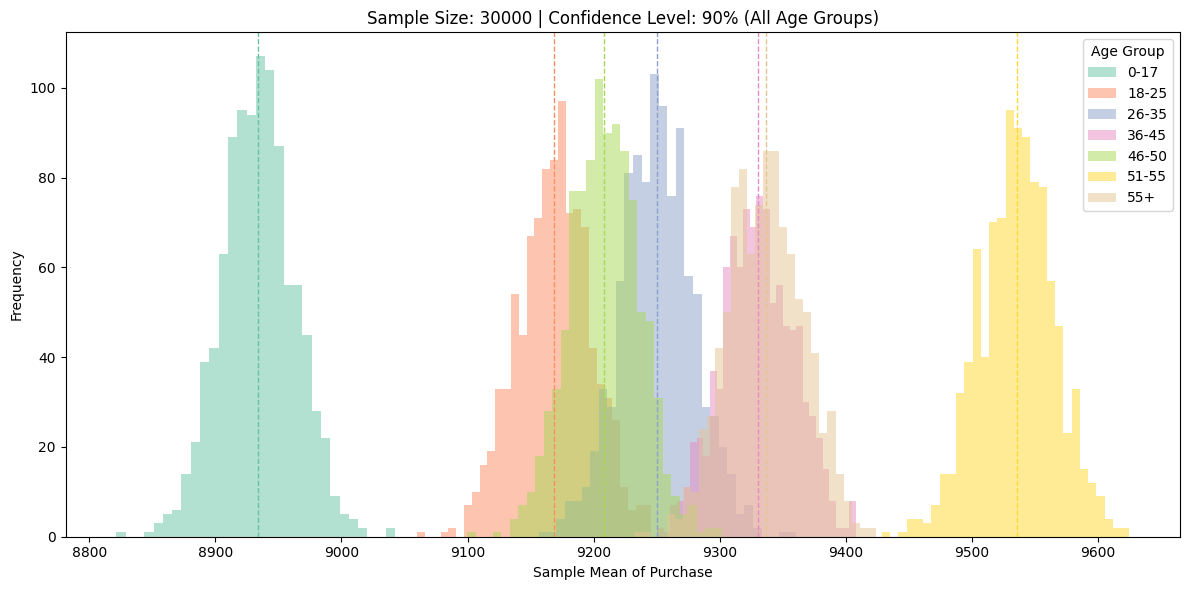

In [68]:
clt_simulation_age_all_in_one(sample_size=30000, confidence_level=0.90)

### Sample size 300, Confidence level = 0.95

Age Group: 0-17 | 95% CI: ₹(8340.47, 9513.22) | Mean: ₹8926.85
Age Group: 18-25 | 95% CI: ₹(8589.89, 9725.56) | Mean: ₹9157.72
Age Group: 26-35 | 95% CI: ₹(8679.86, 9817.15) | Mean: ₹9248.50
Age Group: 36-45 | 95% CI: ₹(8746.41, 9898.38) | Mean: ₹9322.40
Age Group: 46-50 | 95% CI: ₹(8641.45, 9757.98) | Mean: ₹9199.71
Age Group: 51-55 | 95% CI: ₹(8956.58, 10070.92) | Mean: ₹9513.75
Age Group: 55+ | 95% CI: ₹(8754.89, 9883.59) | Mean: ₹9319.24


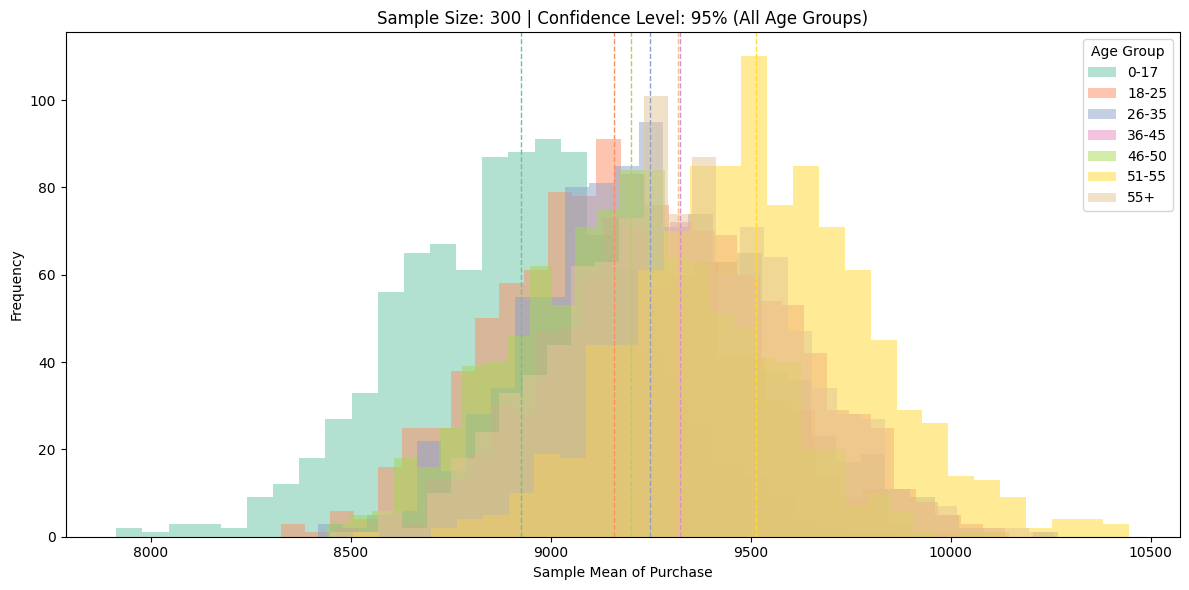

In [69]:
clt_simulation_age_all_in_one(sample_size=300, confidence_level=0.95)

### Sample size 3000, Confidence level = 0.95

Age Group: 0-17 | 95% CI: ₹(8742.38, 9123.07) | Mean: ₹8932.72
Age Group: 18-25 | 95% CI: ₹(8988.36, 9352.59) | Mean: ₹9170.47
Age Group: 26-35 | 95% CI: ₹(9074.30, 9435.39) | Mean: ₹9254.85
Age Group: 36-45 | 95% CI: ₹(9146.46, 9514.80) | Mean: ₹9330.63
Age Group: 46-50 | 95% CI: ₹(9029.75, 9386.69) | Mean: ₹9208.22
Age Group: 51-55 | 95% CI: ₹(9355.25, 9719.26) | Mean: ₹9537.26
Age Group: 55+ | 95% CI: ₹(9152.37, 9511.53) | Mean: ₹9331.95


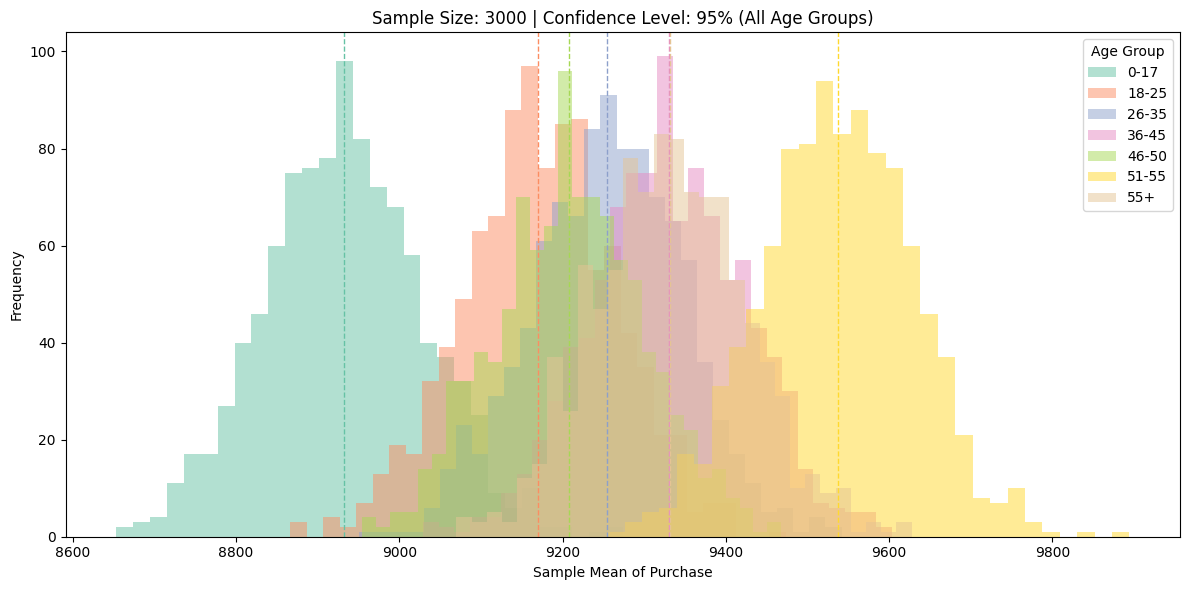

In [70]:
clt_simulation_age_all_in_one(sample_size=3000, confidence_level=0.95)

### Sample size 30000, Confidence level = 0.95

Age Group: 0-17 | 95% CI: ₹(8877.19, 8989.49) | Mean: ₹8933.34
Age Group: 18-25 | 95% CI: ₹(9111.63, 9226.78) | Mean: ₹9169.20
Age Group: 26-35 | 95% CI: ₹(9196.08, 9308.55) | Mean: ₹9252.31
Age Group: 36-45 | 95% CI: ₹(9273.08, 9387.43) | Mean: ₹9330.25
Age Group: 46-50 | 95% CI: ₹(9150.53, 9267.45) | Mean: ₹9208.99
Age Group: 51-55 | 95% CI: ₹(9476.18, 9592.88) | Mean: ₹9534.53
Age Group: 55+ | 95% CI: ₹(9279.73, 9394.74) | Mean: ₹9337.23


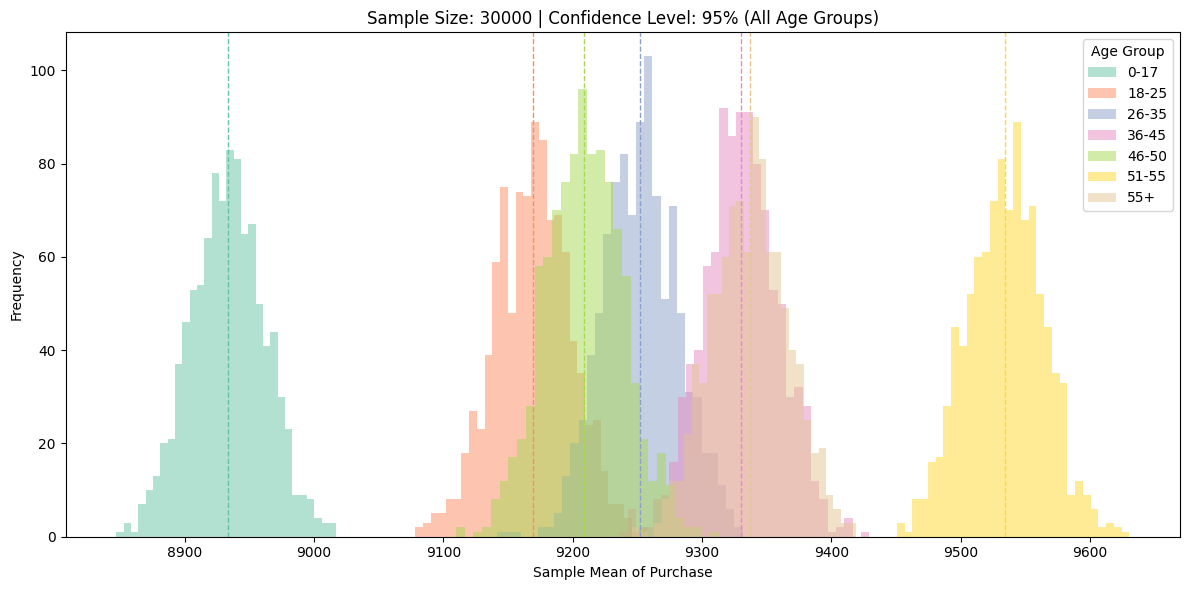

In [71]:
clt_simulation_age_all_in_one(sample_size=30000, confidence_level=0.95)

### Sample size 300, Confidence level = 0.99

Age Group: 0-17 | 99% CI: ₹(8178.38, 9714.96) | Mean: ₹8946.67
Age Group: 18-25 | 99% CI: ₹(8395.19, 9901.94) | Mean: ₹9148.57
Age Group: 26-35 | 99% CI: ₹(8542.62, 9981.02) | Mean: ₹9261.82
Age Group: 36-45 | 99% CI: ₹(8591.52, 10058.27) | Mean: ₹9324.90
Age Group: 46-50 | 99% CI: ₹(8473.07, 9977.32) | Mean: ₹9225.19
Age Group: 51-55 | 99% CI: ₹(8778.14, 10290.15) | Mean: ₹9534.14
Age Group: 55+ | 99% CI: ₹(8616.46, 10074.12) | Mean: ₹9345.29


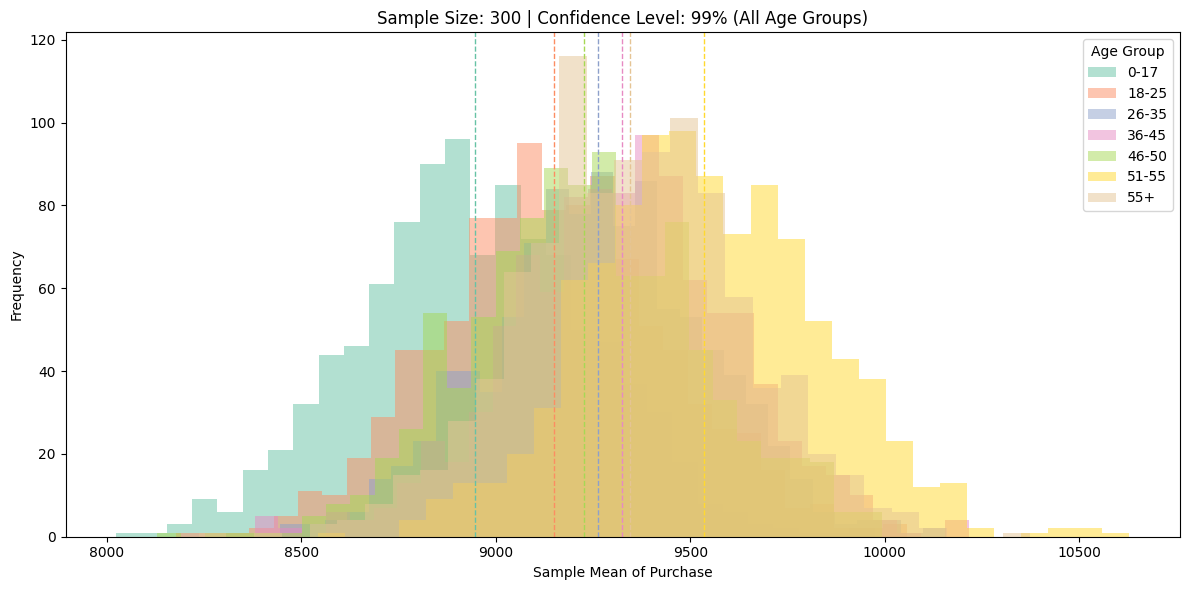

In [72]:
clt_simulation_age_all_in_one(sample_size=300, confidence_level=0.99)

### Sample size 3000, Confidence level = 0.99

Age Group: 0-17 | 99% CI: ₹(8691.37, 9174.60) | Mean: ₹8932.99
Age Group: 18-25 | 99% CI: ₹(8933.93, 9405.93) | Mean: ₹9169.93
Age Group: 26-35 | 99% CI: ₹(9015.10, 9483.38) | Mean: ₹9249.24
Age Group: 36-45 | 99% CI: ₹(9094.89, 9557.57) | Mean: ₹9326.23
Age Group: 46-50 | 99% CI: ₹(8984.09, 9433.12) | Mean: ₹9208.60
Age Group: 51-55 | 99% CI: ₹(9294.92, 9771.88) | Mean: ₹9533.40
Age Group: 55+ | 99% CI: ₹(9086.56, 9582.51) | Mean: ₹9334.54


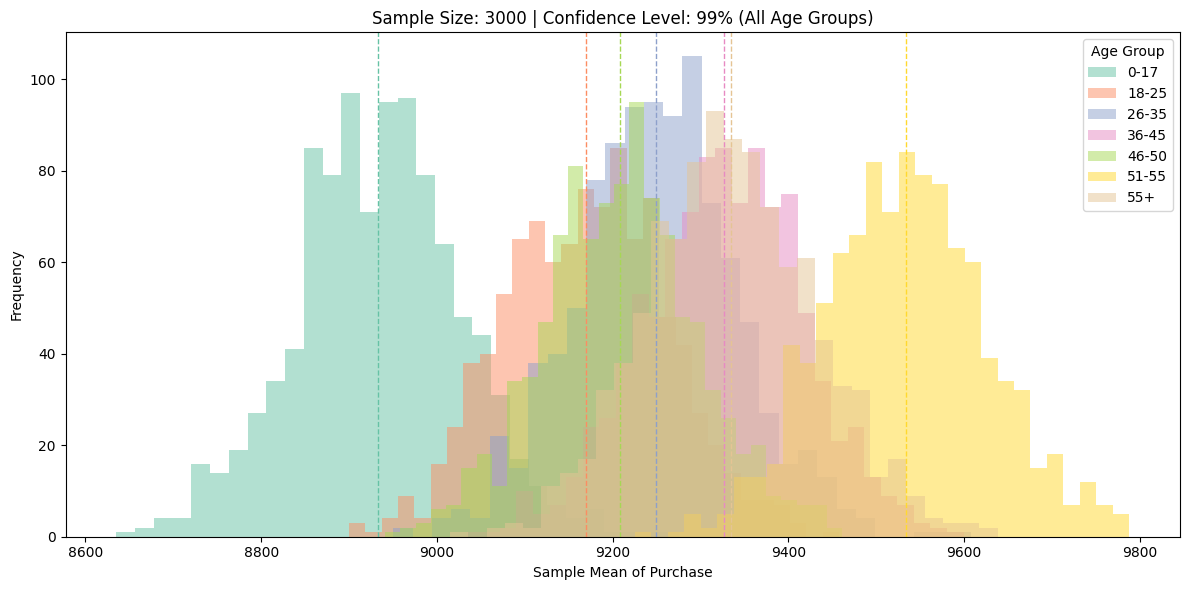

In [73]:
clt_simulation_age_all_in_one(sample_size=3000, confidence_level=0.99)

### Sample size 30000, Confidence level = 0.99

Age Group: 0-17 | 99% CI: ₹(8853.24, 9011.15) | Mean: ₹8932.19
Age Group: 18-25 | 99% CI: ₹(9096.21, 9245.74) | Mean: ₹9170.98
Age Group: 26-35 | 99% CI: ₹(9176.10, 9330.53) | Mean: ₹9253.31
Age Group: 36-45 | 99% CI: ₹(9255.56, 9407.04) | Mean: ₹9331.30
Age Group: 46-50 | 99% CI: ₹(9132.43, 9284.59) | Mean: ₹9208.51
Age Group: 51-55 | 99% CI: ₹(9454.59, 9613.31) | Mean: ₹9533.95
Age Group: 55+ | 99% CI: ₹(9261.58, 9410.12) | Mean: ₹9335.85


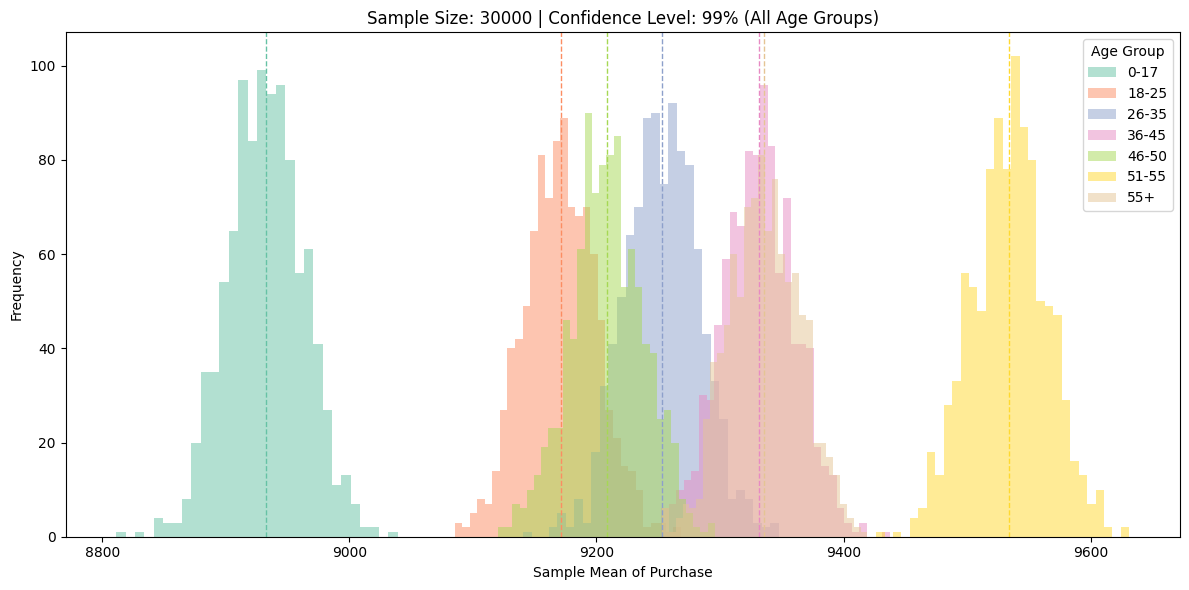

In [74]:
clt_simulation_age_all_in_one(sample_size=30000, confidence_level=0.99)

## **Evaluation Criteria**

### **4. Answering questions**

### Are women spending more money per transaction than men? Why or Why not?

**Answer:** Based on the analysis of the data, men are spending more money per transaction than women.

This conclusion is supported by the mean expenses and their confidence intervals for both male and female customers.

Sample size = 30000, Confidence level = 0.95

Output:

Female: 95% CI: (8682.82, 8786.73) | Mean: **8734.78**

Male: 95% CI: (9380.87, 9492.37) | Mean: **9436.62**


### Confidence intervals and distribution of the mean of the expenses by female and male customers

**Answer:** The confidence intervals and distribution of the mean expenses show a consistent difference between male and female customers:

*  Across different sample sizes (300, 3,000, and 30,000) and confidence levels (90%, 95%, and 99%), the mean expense of male customers is consistently higher than that of female customers.

*  The confidence intervals for males and females do not overlap, especially in larger sample sizes, indicating that the difference in spending is statistically significant.

*  The distribution of the mean becomes narrower as the sample size increases, which shows more precision and stability in estimating the average spending.

*  In all cases, the male distribution is centered at a higher value, confirming that men tend to spend more per transaction than women on average.

### Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements?

**Answer:** Overlapping?
*  Based on the analysis of the data, For the largest sample (30,000), 90% CI
   - Female: 90% CI: ₹(8688.79, 8778.62) | Mean: ₹8733.71
   - Male: 90% CI: ₹(9388.76, 9486.70) | Mean: ₹9437.73
*  These intervals do NOT overlap — the female upper bound is ~₹8778, male lower bound is ~₹9388
*  Same applies at 95% and 99% confidence levels and large sample sizes — no overlap.
*  For smaller sample sizes (300), intervals are wider, but still no overlap:
   - Female (90% CI): ₹(8290.28, 9176.07)
   - Male (90% CI): ₹(8948.52, 9930.58)
   -These have a very small possible overlap region between 8948 and 9176, but mostly are distinct.
*  For smaller samples and higher confidence intervals (e.g., 99%), there may be some overlap due to higher uncertainty, but with more data, the distinction becomes clearer.

**Walmart can leverage this conclusion and make below improvements:**
*  Since males have a consistently higher average spending than females, Walmart can:
  - Tailor marketing and promotions: Create gender-specific campaigns focusing on product categories where males spend more or respond better.
  - Optimize inventory: Stock more products favored by the higher spending group (males), or promote products to females to encourage increased spending.
  - Personalized offers: Use this spending difference to design loyalty rewards, discounts, or bundles that appeal differently to men and women.
  - Analyze product preferences further: Understand which products contribute to this spending gap and target those with customized messaging.

### Results when the same activity is performed for Married vs Unmarried

*  All confidence intervals across all sample sizes (300, 3000, 30000) and confidence levels (90%, 95%, 99%) overlap.
*  This suggests no statistically significant difference between the average spending of married and unmarried customers.
*  **Since spending is statistically similar between married and unmarried customers, walmart can:**
   - Avoid over-segmenting based on marital status — It doesn't significantly affect average spending.
   - Focus on other features (e.g., age, gender, product preferences) for more meaningful segmentation and personalized offers.

### Results when the same activity is performed for Age

Age 51–55 stands out:
*  Highest mean purchase across the board.
*  Maintains this position at all sample sizes and confidence levels.
*  Indicates that middle-aged individuals (~50s) are top spenders.

Stable Middle:
*  Age groups 26–45 show consistent mean values (~₹9250–₹9330).
*  These are predictable and reliable segments.

Youth vs Seniors:
*  0–17 and 18–25 consistently have lower means.
*  55+ shows higher means, indicating increased spending potential with age.

CI Width Compression:
*  For Age 26–35:
   - CI at n=300, 95%: ₹8679.86 to ₹9817.15 → width = ₹1137.29
   - CI at n=30000, 95%: ₹9196.08 to ₹9308.55 → width = ₹112.47
*  Confirms how dramatically precision improves with sample size.

**Walmart can leverage this conclusion and make below improvements:**
*  Target audience for premium/high-value products:
   - Focus on Age 51–55 and 55+, due to their higher purchasing average and stable behavior.
*  Youth segment (0–25) might be more price-sensitive; offer budget-friendly options and deals.
*  Age 26–45: Ideal for general consumer targeting, showing consistent spending across the board.

### **5. Final Insights - Illustrate the insights based on exploration and CLT**

### Comments on the distribution of the variables and relationship between them

Gender:
*  Type: Categorical (M, F).
*  Distribution: Typically binary with imbalanced counts (often more males).
*  Relationship with Purchase:
   - Males have a consistently higher average spending than females,

Marital_Status:
*  Type: Categorical (0, 1)
*  Distribution: Binary
*  Relationship with Purchase:
   - There is no statistically significant difference between the average spending of married and unmarried customers

Age:
*  Type: Ordinal categorical (0–17, 18–25, ..., 55+).
*  Distribution: Spread across 7 ordered groups
*  Relationship with Purchase:
   - (51-55) Highest mean purchase across the board

### Comments for each univariate and bivariate plots

This has been covered in section 1.2 and 1.3 under Evaluation Criteria

### Comments on different variables when generalizing it for Population

1.Gender
*  From the confidence intervals:
   - Mean purchase for Males is higher than for Females across all samples and confidence levels.
   - CIs don't overlap much → Significant difference.

*  Population insight:
   - Males tend to spend more than females on average, and this is likely true for the population.

2.Marital Status
* Married vs Unmarried: Purchase means are very close.
* Their CIs overlap a lot, even at large sample sizes.

*  Population insight:
   - Marital status does not significantly affect purchase amount

3.Age
* Purchase increases with age until about 55, then flattens
* Population insights:
  - Purchase amount gradually increases with age group, peaking around the 51–55 range. This likely reflects a real trend in the general population

### **6. Recommendations**

### Actionable items for business. No technical jargon. No complications. Simple action items that everyone can understand

### **Top Priority(Immediate Revenue/Engagement Impact):**
*  Target high-spenders with premium offers or personalized deals
*  Target high-frequency users with loyalty programs
*  P00025442 and P00059442 are revenue drivers. Promote these in premium campaigns
*  Target male customers more aggressively during Black Friday promotions

### **Medium Priority (Segmentation for Efficient Marketing):**
*  Target 26–35 group with volume-based offers (they shop more frequently)
*  Segment Targeting:
   - Occupation 0, 4, 7 – Use volume-based offers and loyalty programs.
   - Occupation 12, 17 – Use premium upsells.
*  Personalized Offers by Occupation

### **Foundational Support (Operational & Strategic Planning):**
*  Inventory Planning:
   - Stock high-demand items for Occupations 0, 4, 7.
   - Launch premium/niche products for 12, 17.
*  Use value-oriented offers, cashbacks, or discount bundles for City Category A
*  Newcomers (0 years) spend slightly less — use welcome offers or geo-targeted ads
